<a href="https://colab.research.google.com/github/royzheng0904/Intro_to_ML/blob/main/1609367698.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP0088 Individual Coursework: **Heroes of Machlearnia**


# Instructions

For this assignment you are asked to analyse some data and make
predictions from it, explaining and justifying the choices you
make along the way.

**Your dataset is ID 1609367698. This data is unique to you.**

Although everyone is solving the same overall shape of problem, the
details will vary and may give rise to answers that are qualitatively
and numerically different. Do not be surprised if your results do not
agree with those of your colleagues.

The tasks below are mostly solvable with methods covered in the first
half of the module, prior to the coursework release.
One task is deceptively difficult and you may not be able to solve it
“properly”; that is okay, do what you can with the tools available
to you and try to explain why they might be insufficient.
You may employ other methods from beyond the module if you wish,
but there are no bonus marks available for doing so.

All tasks should be performed within this notebook.
For each task, we include:

* an editable **code cell**, in which you should write any code needed
to solve the problem and generate the requisite outputs
* an editable **markdown cell**, in which you should *briefly* explain
your approach and point out anything interesting about the problem
or results

You may find it useful to add further cells for a task, for example to
make your code structure clearer or to interleave plots with your
explanation — this is fine, but make sure that the order and meaning
are unambiguous, and that executing **Run all** on the notebook from
scratch works without errors. Also note that if you split up your text
answer into multiple cells, the word limit applies to the combined total.

**Once you have completed all tasks, submit the whole notebook via Moodle,
along with a CSV file of results that you will generate below.**


# Background

In the bleak highland province of Machlearnia, four clans of
whisky-sodden, claymore-wielding, kilted and bagpiping ruffians
make their homes. They are clans
Buchanan, Livingstone, Macdougall and Macfarlane
and each is more bloodthirsty than the last. Their predilection for
drunken brawling is exceeded only by a profound love of gambling,
and it is by this narrow preference that an uneasy peace has held
for nearly 40 years. Can it survive another?

The highlight of every year is the Autumn Clanmoot, when the clans
come together on neutral ground to feast, carouse, trade insults and
wager vast sums on the arcane sport of Grachlangenball, in a tournament
played over five days. The victorious clan are proclaimed
Heroes of Machlearnia, entitled to wear pheasant feathers in their beards
all winter. They almost never do this, because it looks ridiculous,
but the prize is hotly contested all the same.

Visitors flock to the moot from far beyond the borders of Machlearnia,
for the boozing and spectacle, for the frisson of danger. There is money
to be made and lost, merchandise to be bought and sold, and only a moderate
risk of being run through with a sword.

Visitors like **you**.

This will be your first Clanmoot. You are a stranger around here and you
don't really know how everything works. But you've nosed around a bit and
think you might be able to make your fortune.

The peoples of Machlearnia are characterised by ten frankly cryptic attributes:
capacity, entropy, flourish, granularity, iciness, mood, need, plume_size, rotation and vibe.
You know that a clan's performance in Grachlangenball is largely
determined by these attributes, but you don't know how — and the
clansfolk aren't telling.
In the run-up to this year's Clanmoot you have cunningly obtained
the stats on all the participants, but you don't know who is who.
However, you have also acquired more complete information from last
year's tournament, so hopefully that will give you some clues.

# Setting Up

## Imports

The following cell imports some commonly used Python libraries for
numerical computing and machine learning. It is possible to complete
all tasks using only these imports.

In [2]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import sklearn
import sklearn.linear_model, sklearn.svm, sklearn.neural_network
import sklearn.neighbors, sklearn.tree, sklearn.ensemble
import sklearn.model_selection, sklearn.metrics, sklearn.feature_selection

If for some reason you need to make use of additional libraries
you may do so in the code cell below, with the following provisos:

* **Do not use anything obscure** — libraries should either already
be present on Colab or else readily installable via `pip` with no
configuration required. It is incumbent on you to ensure the markers
will be able to run your code easily, out of the box. We will not
troubleshoot it for you — anything that doesn't work without
intervention will get zero marks.
* **Do not use anything resource intensive** — the time and resources
available for marking this assignment are limited, and we will not even
attempt run anything that is likely to consume a lot of compute, memory
or disk space. This is a modest dataset and there is no reason to
apply heavyweight methods to it.
* **Explain why** you are using these libraries in the markdown cell below.

In [82]:
# TODO: add any additional imports here
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from scipy import stats
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_selection import SelectKBest, f_regression

**TODO**: give reasons for additional imports, if any


## Data

All the data available to you is embedded in the code cell below as
a string literal in CSV format. When you run the cell it is parsed
into a [Pandas](https://pandas.pydata.org/docs/)
[DataFrame](https://pandas.pydata.org//docs/reference/api/pandas.DataFrame.html)
in the variable `data`. Use this to perform
the tasks in the subsequent sections.

We also create a copy of the dataframe, `answers`. Populate this with
your answers for tasks 2—4, below. Use the code cell at the end of the
notebook to export this to a CSV file, and include that file as part
of your coursework submission.

In [64]:
data_csv = '''capacity,entropy,flourish,granularity,iciness,mood,need,plume_size,rotation,vibe,clan,prowess,rank
85.22,81.22,80.57,60.06,94.63,5.77,41.1,94.77,29.52,60.31,buchanan,66095.64,1
88.37,77.52,79.34,60.26,90.74,9.02,49.88,92.55,31.86,49.78,macfarlane,60252.32,2
86.08,77.39,84.85,54.09,107.23,24.77,53.62,95.22,28.48,56.81,macdougall,60150.86,1
87.78,73.85,78.19,61.08,95.83,28.84,52.74,93.41,32.6,53.25,macfarlane,54837.89,2
91.7,78.64,80.99,61.61,100.37,42.73,53.27,92.43,36.11,50.82,livingstone,62249.93,2
83.61,77.61,84.17,61.36,98.94,47.24,47.32,93.36,29.54,62.24,buchanan,60652.51,2
88.19,77.16,81.4,63.22,102.42,23.6,47.74,95.49,32.21,52.98,livingstone,59798.6,1
82.64,75.18,77.91,62.0,91.78,17.14,51.0,91.73,33.67,51.4,macfarlane,56741.38,2
86.19,75.24,76.88,61.19,91.64,22.39,48.79,93.89,35.22,47.26,macfarlane,56872.91,1
84.19,77.39,83.09,59.63,98.76,32.42,44.94,96.23,27.21,63.14,buchanan,60200.71,0
84.52,79.35,83.98,58.83,102.06,10.96,48.0,94.2,29.05,54.48,macdougall,63128.09,0
86.34,76.42,80.28,62.34,103.8,19.81,48.27,95.76,33.05,54.36,livingstone,58637.97,1
85.29,75.26,86.19,54.38,104.74,16.85,48.71,96.2,30.5,58.13,macdougall,56850.08,2
85.21,76.68,84.28,56.71,102.77,24.35,49.53,94.8,30.72,55.83,macdougall,59060.62,0
87.3,74.0,80.27,63.72,93.27,27.02,50.82,92.46,32.87,51.99,macfarlane,55047.82,2
84.34,76.77,82.14,60.77,99.55,17.22,49.18,92.5,30.54,61.14,buchanan,59148.36,1
87.76,75.04,78.65,61.08,94.28,39.61,53.55,91.94,34.41,49.87,macfarlane,56690.38,2
84.37,78.56,85.5,60.33,99.7,26.67,46.93,95.1,28.28,64.51,buchanan,61988.34,1
86.28,76.27,78.06,61.6,94.57,13.97,45.45,91.77,32.83,50.99,macfarlane,58367.28,0
86.69,75.0,81.17,62.25,104.21,32.65,43.63,93.63,34.24,53.81,livingstone,56581.32,0
86.53,79.23,80.51,58.04,97.77,37.53,42.31,95.8,30.21,61.7,buchanan,63127.22,0
88.86,76.76,80.5,62.02,101.2,21.25,45.18,92.32,34.96,53.15,livingstone,59174.62,0
86.81,74.8,79.73,62.05,92.18,8.64,45.52,93.4,31.46,51.46,macfarlane,56105.25,0
85.09,77.32,79.76,61.3,99.54,20.25,51.42,94.43,29.55,61.28,buchanan,60014.15,2
86.19,77.37,82.34,61.81,101.15,19.2,44.4,95.04,27.37,62.12,buchanan,60077.56,2
86.25,78.38,82.45,60.26,99.01,27.52,50.31,95.43,28.58,62.06,buchanan,61712.62,1
86.53,75.98,85.74,56.2,100.97,17.8,51.99,92.91,33.11,56.23,macdougall,57953.58,1
85.08,74.46,78.44,60.21,96.69,33.67,47.89,94.33,32.5,53.63,macfarlane,55776.29,1
88.77,79.15,79.83,59.92,103.1,23.33,47.58,91.6,36.04,52.71,livingstone,62918.82,1
87.83,78.12,77.93,60.13,104.05,20.64,51.46,92.7,34.03,53.23,livingstone,61273.91,2
86.43,77.55,81.52,56.63,99.69,14.16,50.0,93.26,32.78,56.68,macdougall,60337.49,1
85.38,79.35,81.0,62.05,96.53,22.33,46.44,95.7,29.06,60.17,buchanan,63207.61,2
88.79,75.55,78.59,61.16,94.5,29.02,44.8,93.58,33.7,51.64,macfarlane,57382.36,0
85.84,78.53,81.06,54.29,107.71,21.58,49.73,94.8,28.77,57.51,macdougall,61906.83,1
83.69,80.06,82.74,60.3,97.43,2.09,53.49,94.99,28.9,62.84,buchanan,64197.2,1
86.5,75.85,80.5,52.25,106.54,25.95,45.12,94.14,31.28,55.32,macdougall,57807.86,0
86.21,74.15,83.51,57.11,104.38,20.91,55.74,94.67,30.27,59.55,macdougall,55219.42,2
86.29,79.59,83.61,54.3,104.43,34.1,49.97,93.75,31.24,53.34,macdougall,63678.18,0
89.09,77.37,79.81,60.5,106.88,32.26,50.48,95.1,30.61,58.72,livingstone,60178.75,2
84.18,77.73,83.52,60.04,99.21,14.04,50.48,95.42,28.18,65.63,buchanan,60602.38,1
87.91,78.14,78.38,61.22,101.93,25.8,54.11,92.8,36.5,52.28,livingstone,61348.57,2
84.6,80.61,82.58,54.95,103.24,18.41,50.32,94.15,32.19,54.6,macdougall,65205.15,0
86.25,76.47,78.09,61.66,96.44,28.51,48.98,93.85,31.52,52.5,macfarlane,58770.73,1
84.24,78.65,81.97,57.19,100.64,18.13,40.31,94.49,28.19,59.41,buchanan,62069.78,0
88.04,75.4,78.18,61.32,98.68,20.86,40.09,96.01,31.86,56.59,macfarlane,57093.01,0
87.34,77.41,82.31,56.44,100.74,30.19,50.75,94.02,33.01,54.17,macdougall,60233.45,0
88.27,78.16,79.99,63.74,91.42,19.97,52.7,94.3,34.15,50.87,macfarlane,61331.99,2
85.96,78.49,80.57,60.15,98.05,29.59,52.01,96.92,29.07,63.54,buchanan,61901.2,1
83.24,81.71,81.89,61.06,96.22,15.78,51.24,94.52,30.82,59.27,buchanan,66968.14,1
86.75,78.12,83.42,56.57,102.87,17.89,48.73,93.02,31.69,54.55,macdougall,61247.49,0
87.52,76.0,82.25,62.23,93.69,21.97,41.41,93.32,32.39,54.72,macfarlane,58011.02,0
87.64,76.91,80.95,57.39,104.86,12.09,46.54,96.35,29.91,57.5,macdougall,59326.06,1
88.7,75.11,81.18,54.52,106.66,27.43,50.46,96.75,29.81,57.74,macdougall,56696.55,1
87.68,81.26,81.06,57.97,99.45,15.47,54.48,96.34,25.67,60.86,buchanan,66217.13,0
87.17,81.14,78.21,64.0,89.29,22.61,48.23,91.62,35.65,49.14,macfarlane,66102.2,1
87.29,80.44,79.13,59.76,98.52,22.25,53.02,95.69,31.4,61.36,buchanan,64956.01,1
88.15,75.97,82.95,54.72,103.23,7.5,44.18,95.47,32.8,59.84,macdougall,57865.35,2
87.41,76.18,77.11,61.43,90.81,16.64,49.78,90.86,33.37,50.57,macfarlane,58250.52,1
88.73,74.6,79.69,62.55,92.94,16.88,50.24,95.72,32.66,53.37,macfarlane,55867.63,2
88.6,76.44,79.1,62.87,92.67,33.94,46.97,92.57,32.91,51.96,macfarlane,58767.05,1
85.2,77.31,84.99,57.74,100.99,14.56,45.32,92.94,30.78,55.24,macdougall,59962.69,0
88.29,78.22,80.94,63.72,90.44,15.44,49.75,93.23,30.68,49.92,macfarlane,61383.79,1
88.6,76.16,79.69,62.47,95.54,26.02,49.59,94.43,31.9,51.7,macfarlane,58281.11,1
85.57,75.52,78.72,60.9,93.1,16.25,42.4,93.05,34.1,51.86,macfarlane,57249.03,0
88.7,75.32,79.29,62.14,104.46,18.74,44.65,93.23,34.76,57.59,livingstone,56966.49,0
85.86,75.17,78.67,60.86,94.12,30.86,55.11,91.58,34.83,49.94,macfarlane,56826.0,2
86.96,81.1,78.1,60.79,93.16,13.43,54.8,91.14,32.83,57.92,buchanan,65964.58,1
88.4,76.37,79.1,61.83,96.03,18.25,48.99,93.47,30.53,52.74,macfarlane,58543.2,1
83.73,75.82,82.61,54.3,106.01,27.56,46.36,97.5,27.98,58.79,macdougall,57763.5,2
88.59,79.56,84.16,54.3,103.36,30.13,49.56,96.01,30.08,56.87,macdougall,63599.27,1
86.77,77.48,84.06,55.27,103.0,28.37,48.45,93.79,30.42,56.22,macdougall,60321.41,1
88.05,77.74,81.7,55.12,106.57,26.53,54.06,95.97,28.61,57.9,macdougall,60706.5,2
87.48,75.8,79.65,61.31,96.59,26.13,49.74,90.47,33.45,52.59,macfarlane,57739.53,1
87.81,75.18,82.13,60.12,97.88,10.95,46.82,95.08,30.28,56.46,macfarlane,56687.8,0
86.29,76.06,80.11,60.32,91.94,14.89,48.78,95.04,32.06,50.55,macfarlane,58051.62,1
88.15,78.73,82.1,53.66,103.79,29.91,45.23,93.5,31.61,58.56,macdougall,62288.38,2
87.15,74.07,82.95,61.76,107.18,15.15,48.45,97.12,33.88,57.86,livingstone,55071.32,1
86.79,79.28,80.05,60.98,94.04,22.81,48.33,95.39,29.62,60.05,buchanan,63101.65,1
84.56,76.81,83.74,53.69,102.62,20.4,43.45,94.11,31.09,57.69,macdougall,59233.8,1
86.91,77.09,82.99,56.22,100.23,27.83,47.24,92.74,32.65,55.75,macdougall,59721.43,0
86.65,76.19,85.13,55.11,105.1,38.2,48.68,95.83,28.99,57.49,macdougall,58403.37,1
87.04,75.91,78.32,61.72,92.92,-3.14,50.86,92.92,32.48,51.49,macfarlane,57698.89,2
85.43,75.13,84.75,57.15,106.38,21.66,42.85,95.94,30.27,59.16,macdougall,56687.7,2
89.64,79.29,79.1,58.48,96.21,39.09,49.72,95.5,27.88,60.14,buchanan,63226.21,0
84.82,79.13,82.82,60.48,97.6,25.07,38.4,95.93,29.1,63.08,buchanan,62878.41,1
87.76,77.66,82.97,55.36,104.72,25.89,51.7,94.79,30.43,54.45,macdougall,60583.32,0
89.92,76.78,78.79,62.37,89.8,13.06,50.38,91.21,35.6,50.13,macfarlane,59149.9,2
85.98,75.38,78.86,62.45,93.57,20.74,49.23,93.83,36.01,52.43,macfarlane,57074.64,1
89.75,76.01,78.15,62.4,102.72,15.42,44.86,94.6,34.51,55.98,livingstone,57986.75,0
85.97,78.08,84.23,55.37,101.51,25.53,50.49,95.09,29.89,55.94,macdougall,61233.08,1
86.92,76.98,80.53,61.73,94.86,40.19,46.75,90.93,32.99,50.87,macfarlane,59639.59,0
87.37,75.55,79.04,61.12,92.47,17.27,49.98,92.96,33.03,51.92,macfarlane,57297.93,2
87.36,75.89,82.45,56.61,101.23,6.55,43.04,92.57,33.23,56.26,macdougall,57738.33,1
89.4,75.68,81.67,58.97,106.15,14.63,65.06,94.99,34.61,56.98,livingstone,57480.82,2
84.21,81.04,79.32,58.28,96.0,16.9,45.32,94.54,29.87,59.08,buchanan,65882.95,0
88.28,76.06,82.81,52.69,104.97,7.72,39.28,92.29,29.11,58.65,macdougall,57992.53,2
89.8,75.79,80.22,61.7,103.69,19.79,43.87,91.84,35.3,55.19,livingstone,57685.66,0
84.13,78.73,83.57,63.43,95.67,17.76,41.07,94.16,30.31,62.33,buchanan,62199.22,2
86.53,74.77,78.86,63.2,95.76,25.32,53.31,94.0,32.66,50.78,macfarlane,56180.72,2
87.12,78.22,81.69,56.45,105.53,23.44,44.38,95.79,30.68,57.79,macdougall,61439.93,1
87.07,77.17,83.9,55.15,103.3,18.36,47.47,94.33,32.77,59.32,macdougall,59779.06,2
85.32,76.62,82.92,55.16,104.4,25.54,47.49,97.91,30.38,58.53,macdougall,58976.23,2
85.2,73.78,81.19,61.38,96.3,23.38,46.29,96.03,30.99,53.49,macfarlane,54691.44,0
86.82,78.45,80.12,63.73,86.91,16.76,52.91,91.45,37.14,48.52,macfarlane,61772.74,2
88.36,73.76,78.15,61.36,94.38,19.86,51.29,93.43,33.95,53.33,macfarlane,54646.23,2
86.42,75.96,79.86,61.93,95.89,14.81,55.27,92.14,32.17,53.3,macfarlane,57899.45,2
90.25,76.52,78.09,59.08,108.68,28.48,48.7,93.93,33.3,56.16,livingstone,58852.3,1
86.21,77.02,83.94,55.47,103.15,35.04,53.56,96.03,32.19,58.68,macdougall,59662.7,2
86.21,78.51,80.21,62.95,92.71,10.26,37.21,94.15,33.39,53.74,macfarlane,61810.08,0
90.25,74.63,80.07,62.29,104.89,14.68,51.11,93.67,32.57,54.51,livingstone,55896.66,2
86.21,80.37,79.98,60.35,98.73,26.37,50.39,96.82,27.71,63.25,buchanan,64861.07,1
87.91,77.87,83.6,57.32,99.92,12.3,43.89,92.2,32.4,52.96,macdougall,60820.38,0
85.77,76.42,79.42,61.54,91.47,30.48,46.19,91.17,33.44,50.25,macfarlane,58713.96,0
87.68,78.42,77.95,60.53,90.8,10.35,53.14,93.21,32.76,50.05,macfarlane,61667.92,2
85.59,78.72,81.76,57.31,103.96,22.45,53.42,92.75,32.98,56.1,macdougall,62224.4,1
87.5,76.83,79.61,60.76,101.68,27.05,48.82,92.31,35.52,51.12,livingstone,59324.29,1
87.85,74.86,83.78,56.22,106.49,23.26,44.31,95.46,28.41,57.85,macdougall,56288.39,2
89.36,76.48,76.56,62.56,100.4,28.98,54.67,92.82,38.38,52.64,livingstone,58809.89,2
90.18,77.21,81.5,60.46,103.95,17.11,54.59,92.85,34.94,55.27,livingstone,59838.28,2
83.27,77.17,84.8,59.76,97.88,13.85,47.6,96.42,28.58,63.35,buchanan,59734.71,1
87.52,79.25,83.65,55.88,102.29,37.08,48.76,92.47,32.97,55.19,macdougall,63163.96,0
90.17,75.34,78.24,61.76,104.91,13.34,48.22,91.41,36.37,55.35,livingstone,56963.54,1
88.86,75.97,80.4,61.86,103.4,18.2,47.81,93.04,35.8,50.92,livingstone,57949.23,1
84.27,77.08,78.69,63.45,93.68,15.86,50.14,92.38,34.79,48.78,macfarlane,59628.68,2
87.44,76.1,83.43,55.88,107.54,19.52,57.21,97.05,31.15,58.76,macdougall,58142.04,2
86.0,72.65,81.38,61.32,98.58,30.45,49.54,95.9,30.75,53.69,macfarlane,53085.54,1
85.64,79.78,79.29,58.8,97.34,24.79,45.82,94.27,31.2,59.24,buchanan,63915.57,0
85.73,76.58,79.85,61.01,94.81,22.79,51.74,94.71,31.55,51.6,macfarlane,58899.13,2
84.97,77.02,84.8,54.9,104.61,15.27,50.33,96.48,29.03,56.83,macdougall,59514.86,1
82.69,78.77,83.85,59.02,98.24,23.32,50.04,95.18,28.09,62.45,buchanan,62294.62,0
84.31,77.67,82.19,59.48,98.06,24.09,42.99,97.92,26.49,63.79,buchanan,60574.36,0
86.93,78.12,81.53,57.58,101.13,13.42,43.01,92.83,32.65,53.67,macdougall,61219.28,0
88.63,77.35,82.75,55.46,100.36,15.27,47.46,93.78,32.47,54.97,macdougall,60034.46,0
86.1,78.7,78.88,60.98,97.18,30.63,48.14,97.2,29.31,61.35,buchanan,62239.21,1
89.18,77.19,80.32,60.59,105.29,19.27,40.6,94.48,33.67,56.2,livingstone,59818.77,0
84.02,76.74,81.79,59.89,98.09,20.96,44.23,95.59,30.72,59.09,buchanan,59129.13,1
86.37,75.84,78.41,63.63,93.59,19.23,44.6,92.45,33.56,52.56,macfarlane,57752.49,0
87.09,76.67,81.35,55.41,107.27,8.66,51.91,95.9,32.38,57.46,macdougall,58940.55,1
88.01,78.59,81.66,54.18,102.43,26.84,49.02,93.86,31.08,52.91,macdougall,62044.9,0
84.5,79.1,78.06,61.28,97.5,13.33,49.63,96.12,29.3,60.73,buchanan,62749.39,1
88.08,74.45,80.91,61.24,103.18,11.55,44.32,93.0,35.2,52.37,livingstone,55614.27,0
88.1,73.84,77.36,62.92,104.83,26.68,41.3,96.33,35.78,53.99,livingstone,54817.59,0
88.76,75.94,81.38,58.31,103.43,23.26,48.16,93.31,31.52,57.57,macdougall,57926.22,1
89.52,74.28,82.86,61.89,103.72,20.82,48.65,92.93,30.61,53.78,livingstone,55412.82,1
86.81,75.69,80.9,55.71,104.01,18.66,40.9,96.84,29.06,54.75,macdougall,57507.89,0
85.09,78.76,81.48,61.68,98.7,35.86,48.07,96.64,29.28,63.0,buchanan,62370.23,2
87.97,76.98,78.92,61.52,103.51,19.7,50.73,93.37,40.05,53.81,livingstone,59517.24,2
85.66,73.66,80.27,63.75,92.05,4.06,46.67,92.28,31.85,54.34,macfarlane,54381.99,0
85.89,76.63,84.5,58.9,98.89,17.46,54.37,95.48,29.12,61.63,buchanan,58931.21,0
86.41,75.68,81.1,61.68,92.78,10.0,46.5,92.08,34.22,51.32,macfarlane,57447.04,0
87.08,76.74,78.16,60.28,94.6,33.4,45.27,93.68,32.99,51.04,macfarlane,59223.0,0
88.48,77.39,80.25,62.02,103.8,15.39,49.45,92.18,34.96,54.54,livingstone,60104.87,2
88.52,76.19,78.2,60.63,103.08,16.48,40.63,93.72,34.87,53.19,livingstone,58269.02,0
86.9,75.96,83.93,56.22,100.94,41.43,43.61,93.5,32.58,55.57,macdougall,58086.94,0
85.73,78.86,83.14,61.07,99.15,21.96,43.32,96.37,27.92,62.13,buchanan,62426.38,1
89.78,77.84,78.71,60.95,92.42,17.96,51.92,90.8,32.98,51.89,macfarlane,60815.47,2
86.88,78.53,78.87,62.98,93.95,18.85,48.15,94.06,33.05,52.08,macfarlane,61900.67,1
87.47,75.53,83.82,54.44,108.3,13.7,48.68,95.41,31.11,57.43,macdougall,57237.09,1
87.78,78.29,79.95,63.6,90.56,20.11,45.96,94.85,34.65,49.5,macfarlane,61537.94,0
84.25,78.35,81.34,59.33,98.59,24.1,55.32,98.57,28.86,62.0,buchanan,61642.39,0
86.13,76.49,82.5,55.58,105.81,21.77,49.91,94.91,29.6,59.59,macdougall,58748.48,2
86.35,78.0,81.98,56.37,102.98,13.6,42.65,93.57,33.35,56.03,macdougall,61035.16,1
87.22,76.67,81.63,62.33,91.86,9.95,41.06,93.1,30.9,53.06,macfarlane,58945.35,0
88.57,77.21,82.97,57.91,104.82,17.63,44.35,94.77,29.93,55.63,macdougall,59827.0,0
85.25,78.66,82.54,61.95,97.05,9.29,50.81,96.96,29.27,61.87,buchanan,62026.88,2
86.47,75.75,78.53,61.51,94.06,26.77,44.76,92.63,31.52,50.75,macfarlane,57662.32,0
88.52,76.24,78.6,60.32,93.96,16.0,50.62,95.1,33.1,50.83,macfarlane,58336.83,2
86.17,72.26,84.23,55.1,108.39,36.6,51.33,99.52,27.25,58.87,macdougall,52553.02,2
87.4,75.17,79.84,62.01,95.49,17.4,48.98,94.61,33.42,52.12,macfarlane,56727.45,1
89.47,75.86,81.14,60.38,103.32,29.06,52.08,94.11,35.77,54.01,livingstone,57858.05,2
86.97,74.15,79.54,62.1,95.05,34.79,47.01,95.96,32.62,53.39,macfarlane,55323.76,1
90.14,76.66,80.71,60.59,105.39,32.06,43.01,94.65,35.36,54.46,livingstone,59098.01,0
86.88,76.72,79.21,60.37,89.89,30.15,45.26,93.0,31.31,49.86,macfarlane,59164.59,0
87.52,76.49,84.36,56.47,107.77,25.38,46.65,94.02,32.44,57.83,macdougall,58782.17,2
85.39,76.68,81.02,63.67,91.41,7.18,48.33,93.18,33.19,49.38,macfarlane,58948.05,1
87.79,78.03,81.81,55.85,105.77,36.86,39.66,95.99,31.02,55.25,macdougall,61237.88,0
86.34,75.99,80.11,61.14,96.33,27.89,47.86,94.75,30.71,52.77,macfarlane,58032.03,1
86.53,77.24,85.03,55.24,103.96,35.19,46.92,95.02,31.32,57.19,macdougall,60000.8,1
86.32,79.38,82.25,54.5,105.06,11.41,45.12,91.4,32.55,54.96,macdougall,63189.46,0
87.57,75.05,81.62,62.09,108.46,29.06,48.66,93.71,32.67,56.22,livingstone,56626.45,1
88.6,76.9,79.27,60.0,93.74,21.06,45.88,94.3,34.76,49.37,macfarlane,59387.89,0
88.4,75.42,79.18,60.78,93.85,27.6,53.4,93.56,33.55,51.09,macfarlane,57175.65,2
85.84,78.89,85.48,57.06,100.77,18.7,47.88,93.93,30.58,55.52,macdougall,62458.98,0
88.5,74.08,80.75,60.33,92.17,27.96,49.78,91.94,36.32,50.55,macfarlane,55183.13,1
84.98,78.14,83.55,61.36,101.0,30.28,53.37,95.99,29.52,62.33,buchanan,61359.15,2
87.11,75.49,81.94,63.31,95.83,19.29,45.38,94.21,30.49,53.03,macfarlane,57213.83,0
86.82,76.67,83.23,55.57,105.27,15.93,47.09,95.67,30.91,57.24,macdougall,58987.06,1
87.1,75.49,78.85,60.95,93.46,17.7,50.9,93.57,33.84,51.3,macfarlane,57212.75,2
86.21,77.06,83.21,56.59,103.95,18.87,45.38,93.85,31.87,56.52,macdougall,59610.15,1
86.61,74.69,81.96,59.38,100.2,32.84,48.95,95.45,30.48,55.29,macfarlane,56107.18,1
88.12,76.51,80.14,60.63,95.18,14.38,45.52,92.76,34.17,54.2,macfarlane,58740.94,0
84.49,80.21,80.78,58.95,95.06,29.55,55.82,95.6,30.1,60.65,buchanan,64633.43,0
88.4,77.45,82.3,54.7,104.62,20.0,44.79,92.17,31.6,56.51,macdougall,60219.83,1
87.72,78.7,83.03,56.67,101.53,10.23,51.42,92.64,31.67,55.96,macdougall,62103.72,1
87.97,76.81,80.29,60.59,102.05,34.95,41.42,90.54,36.6,50.58,livingstone,59352.41,0
88.97,77.23,81.5,61.88,91.12,26.67,47.1,92.41,34.41,51.8,macfarlane,59934.82,1
90.21,75.85,78.87,62.78,95.7,39.06,47.34,92.09,31.56,52.2,macfarlane,57900.34,1
88.36,74.91,80.0,62.04,103.31,22.62,48.2,92.48,33.16,53.05,livingstone,56372.85,1
85.99,78.21,80.47,59.76,93.16,19.04,50.27,91.18,33.91,48.78,macfarlane,61402.93,2
90.31,76.89,80.14,63.71,103.06,34.51,49.85,94.25,36.07,53.25,livingstone,59470.43,2
88.43,74.44,81.09,62.31,104.67,21.12,45.48,96.27,34.59,56.74,livingstone,55664.76,1
88.78,78.24,79.12,59.28,102.9,25.37,49.02,91.71,33.24,54.54,livingstone,61492.27,2
88.76,76.25,82.95,55.97,100.61,19.11,60.78,93.46,33.68,53.58,macdougall,58375.41,0
85.12,73.83,79.02,60.57,95.5,15.31,46.16,94.06,34.18,54.16,macfarlane,54718.45,0
90.6,78.31,79.71,58.57,103.25,29.98,50.32,92.98,37.23,52.35,livingstone,61646.1,2
86.2,75.57,81.15,55.98,105.23,31.0,43.48,96.21,28.42,57.79,macdougall,57410.44,1
86.79,76.91,81.43,53.54,107.27,38.25,52.49,95.52,28.31,56.64,macdougall,59504.23,1
88.56,73.9,82.44,61.89,104.05,5.3,38.41,94.73,35.46,54.36,livingstone,54755.6,0
86.98,74.92,81.69,61.14,104.78,26.74,54.42,94.18,33.19,56.09,livingstone,56416.66,2
88.68,73.68,78.97,62.05,98.51,25.67,51.48,95.67,31.98,55.65,macfarlane,54563.1,2
85.17,76.39,78.96,62.47,89.63,18.43,44.71,91.07,35.13,47.09,macfarlane,58588.73,0
86.79,76.33,81.56,63.8,103.49,3.71,45.16,91.86,34.47,53.54,livingstone,58392.2,0
87.11,78.71,81.64,59.5,99.5,33.1,47.8,96.9,28.97,64.17,buchanan,62271.21,0
89.68,75.78,83.94,62.06,103.83,26.0,44.98,92.8,32.09,56.02,livingstone,57704.43,0
86.42,74.13,80.18,61.34,95.39,15.24,51.88,94.75,33.7,55.34,macfarlane,55160.38,2
87.44,76.85,80.35,62.64,104.23,32.58,40.48,94.31,35.51,53.08,livingstone,59393.89,0
86.91,77.61,84.55,54.91,108.24,25.31,39.4,96.43,30.74,58.08,macdougall,60502.52,2
86.68,75.88,76.74,63.06,92.91,27.01,44.89,92.59,32.93,51.91,macfarlane,57865.57,0
88.34,75.98,80.44,62.13,95.16,28.23,47.73,92.84,31.29,50.91,macfarlane,58021.12,1
86.76,74.91,77.72,63.52,92.46,33.42,52.57,93.96,33.44,53.58,macfarlane,56449.57,2
87.7,75.27,79.59,61.59,94.13,29.62,48.58,92.2,32.27,54.84,macfarlane,56959.79,1
88.24,75.76,79.47,65.03,101.99,18.87,54.63,94.04,36.7,49.72,livingstone,57638.01,2
88.92,76.71,76.6,60.59,93.23,24.05,47.86,92.39,30.49,49.51,macfarlane,59103.91,1
86.59,78.13,82.06,58.53,97.28,6.2,49.63,94.45,29.29,62.35,buchanan,61174.16,0
84.42,77.62,82.13,59.7,97.93,13.22,48.41,96.69,27.99,63.65,buchanan,60425.15,0
86.99,76.96,80.58,62.37,92.21,15.8,49.68,92.91,31.67,50.65,macfarlane,59433.93,1
86.58,76.83,81.99,60.91,102.44,26.56,45.33,93.01,34.02,55.96,livingstone,59316.42,0
84.94,80.81,80.16,58.99,97.51,36.08,50.22,94.43,30.89,59.81,buchanan,65647.79,0
87.26,77.89,78.93,60.18,101.96,24.42,49.33,92.46,36.28,52.85,livingstone,60948.14,2
83.8,76.92,84.38,61.39,96.13,18.71,55.25,93.42,29.98,61.73,buchanan,59387.72,2
84.2,78.77,81.59,58.23,99.03,29.07,48.02,96.8,28.82,63.01,buchanan,62337.15,0
88.28,77.53,79.81,63.78,102.7,26.99,46.44,92.99,35.89,53.1,livingstone,60405.38,1
86.31,76.97,85.89,55.28,102.66,21.2,47.13,94.12,30.03,58.1,macdougall,59482.28,2
85.63,79.39,80.17,62.1,94.56,28.79,53.77,96.03,33.67,58.14,buchanan,63330.26,2
84.42,76.48,84.72,59.04,102.61,22.62,52.48,96.93,29.88,65.25,buchanan,58740.0,0
85.07,79.72,81.47,60.74,95.82,28.6,45.94,94.5,29.73,62.54,buchanan,63842.16,1
85.52,81.14,81.42,61.34,96.64,20.48,50.22,94.8,31.89,59.89,buchanan,66076.05,2
90.16,75.95,80.2,61.77,96.44,11.94,47.35,92.17,31.8,54.53,macfarlane,57863.1,1
86.37,77.74,78.75,62.07,105.09,27.51,47.17,92.43,33.26,54.69,livingstone,60727.42,1
85.37,76.73,84.08,61.91,99.29,26.55,49.69,95.81,30.44,62.89,buchanan,59152.11,2
88.23,76.05,80.81,61.92,102.09,37.89,46.11,92.3,35.75,53.8,livingstone,58208.51,1
89.16,76.76,80.64,64.41,103.43,14.17,46.07,94.5,35.17,53.97,livingstone,59125.61,1
85.01,77.64,82.77,55.46,107.24,8.63,51.29,95.42,30.91,57.03,macdougall,60433.06,1
88.51,75.64,80.12,64.86,102.05,29.68,44.51,94.43,35.7,52.13,livingstone,57529.05,0
85.48,77.13,80.49,58.13,95.1,24.96,50.61,93.7,29.42,60.16,buchanan,59753.25,0
87.8,76.78,82.84,55.38,103.48,37.01,53.5,92.38,31.18,56.47,macdougall,59304.31,1
88.38,78.08,79.97,57.64,101.72,18.59,51.76,94.81,31.0,55.84,macdougall,61188.08,0
87.48,74.39,80.45,60.5,95.26,10.54,48.28,95.67,34.03,54.27,macfarlane,55514.58,1
89.42,76.85,81.98,62.39,104.96,24.38,40.66,94.58,34.09,54.5,livingstone,59332.24,0
87.15,75.56,83.49,55.27,104.9,2.84,42.8,95.28,32.11,59.09,macdougall,57209.49,2
85.57,77.48,84.23,55.49,106.45,29.29,50.18,95.76,30.34,60.38,,,
84.18,78.35,79.63,61.65,97.92,42.21,53.56,96.42,28.81,58.88,,,
88.3,76.84,78.46,62.94,94.57,9.4,43.85,95.64,34.6,52.92,,,
86.76,77.44,79.62,60.67,104.14,18.21,51.5,93.15,35.88,52.96,,,
89.81,78.23,79.07,61.96,100.5,20.33,52.28,93.95,36.26,50.97,,,
88.09,76.55,83.24,55.02,104.28,24.48,52.58,93.52,29.75,57.97,,,
86.16,78.15,81.66,54.19,102.83,29.51,48.95,93.21,34.32,54.68,,,
87.53,75.62,84.24,63.36,104.2,10.72,52.58,93.13,33.81,53.53,,,
86.36,78.4,83.69,58.25,95.69,13.18,45.71,93.34,30.97,60.7,,,
84.02,79.77,81.87,60.75,94.89,19.88,42.86,95.93,30.13,61.16,,,
86.36,75.84,78.63,61.65,94.06,10.32,43.6,94.42,33.4,49.25,,,
89.94,73.7,81.95,63.53,104.06,36.34,52.9,95.59,34.49,56.22,,,
88.95,76.13,82.03,61.39,106.89,15.47,55.73,95.86,34.69,57.66,,,
87.33,76.19,79.51,61.63,91.84,22.97,43.53,90.92,35.44,52.29,,,
85.3,76.44,84.18,52.96,109.73,20.67,50.44,95.56,27.83,59.88,,,
87.19,80.71,79.92,58.58,100.25,15.34,47.58,96.45,28.99,64.19,,,
86.56,76.74,78.65,62.64,90.31,29.77,43.22,92.79,37.54,49.02,,,
86.64,75.83,80.44,62.69,93.82,18.12,44.74,91.66,30.99,53.17,,,
84.17,80.92,80.74,61.05,97.54,25.7,39.17,93.81,28.77,60.8,,,
87.99,76.25,79.89,60.66,101.71,21.72,45.06,93.1,35.89,52.76,,,
86.32,78.23,81.2,62.07,92.27,21.26,46.8,94.13,33.45,50.88,,,
85.73,75.5,81.04,62.06,97.4,25.4,52.8,91.54,30.37,51.27,,,
83.83,75.37,84.19,61.07,103.38,24.75,41.64,95.83,25.21,65.66,,,
87.6,75.62,78.32,59.57,94.2,16.54,45.17,92.86,35.3,51.06,,,
86.11,78.62,80.23,61.13,100.26,12.76,49.99,94.93,27.52,62.66,,,
88.23,75.03,80.88,55.01,104.88,26.12,61.18,94.41,27.65,57.45,,,
86.47,76.89,81.92,53.12,107.85,27.09,46.16,96.39,28.59,58.32,,,
87.35,75.35,85.66,53.44,108.68,20.55,49.27,97.82,27.5,61.34,,,
87.45,75.38,83.57,53.87,104.68,20.61,48.62,95.47,32.57,57.21,,,
87.85,75.93,83.25,61.82,102.9,28.18,49.34,93.32,33.67,54.65,,,
85.32,77.49,82.74,60.35,100.16,30.71,44.56,96.98,26.02,63.91,,,
90.32,77.57,80.83,58.84,102.53,32.21,47.14,91.94,35.59,52.74,,,
87.75,76.5,77.94,62.48,94.4,18.14,49.66,92.28,34.8,51.49,,,
87.5,76.77,82.88,52.54,105.43,31.86,51.49,93.52,30.8,56.44,,,
85.2,76.05,82.68,54.46,100.45,31.35,48.27,95.04,33.63,55.8,,,
85.49,75.59,81.32,62.55,93.61,14.72,50.32,91.66,32.52,52.39,,,
85.75,73.21,81.0,63.97,92.95,38.15,45.08,92.06,34.5,53.13,,,
89.04,76.39,77.66,62.38,103.65,7.6,46.42,93.08,36.15,51.33,,,
87.48,76.03,79.56,63.45,103.11,34.44,46.84,92.47,33.78,53.55,,,
85.86,76.04,84.56,58.18,103.61,21.71,45.63,93.98,30.28,57.59,,,
87.18,76.67,83.66,58.21,99.32,23.57,44.79,92.6,35.65,56.02,,,
88.58,75.82,78.51,61.55,89.69,30.85,54.94,91.81,36.85,49.13,,,
88.44,76.36,79.88,63.16,99.93,29.67,47.29,90.52,37.38,52.52,,,
88.69,77.78,81.89,61.35,101.98,30.0,52.83,92.16,37.22,53.81,,,
84.84,80.66,81.93,57.27,97.77,18.59,51.3,97.81,28.7,60.27,,,
88.69,76.54,82.78,61.62,106.79,23.74,47.45,94.51,34.19,56.76,,,
87.23,78.02,81.64,61.57,103.57,29.91,45.28,94.13,34.59,55.25,,,
85.34,76.13,83.24,53.77,108.7,29.82,52.02,96.82,27.65,59.27,,,
84.91,77.37,83.05,62.53,97.71,25.94,46.58,94.81,28.11,64.1,,,
88.7,75.58,80.51,60.08,89.75,37.02,50.05,90.56,32.7,52.19,,,
85.61,80.14,82.88,54.52,102.63,21.81,54.53,94.41,33.79,54.87,,,
91.69,76.93,80.17,60.47,103.73,28.88,45.57,92.93,36.16,52.59,,,
85.34,78.4,81.08,61.79,93.36,20.05,45.09,93.71,29.6,59.1,,,
85.59,75.44,82.18,58.24,95.6,19.82,54.84,94.12,33.48,53.14,,,
84.17,80.94,81.22,61.6,96.4,9.4,44.46,95.96,30.74,60.57,,,
89.13,75.52,81.13,62.3,102.82,16.05,37.98,94.27,33.57,55.09,,,
87.47,77.35,81.51,56.52,101.77,33.14,52.89,94.12,32.28,55.56,,,
85.77,78.84,86.06,56.33,106.82,7.33,51.39,92.11,31.95,58.38,,,
87.84,75.32,79.15,60.91,94.9,26.62,47.09,95.07,33.25,53.06,,,
87.09,78.14,78.96,60.9,97.11,20.76,52.83,94.06,31.09,59.13,,,
83.08,79.26,84.6,61.89,98.42,23.72,47.73,95.68,27.72,63.84,,,
90.12,73.93,79.44,62.05,96.54,30.86,46.16,96.15,32.3,54.05,,,
86.63,78.17,82.15,57.57,105.11,29.44,40.72,95.04,29.27,56.29,,,
87.01,75.97,83.25,57.06,106.95,20.51,57.28,96.23,28.3,61.04,,,
86.26,75.32,84.97,52.92,107.26,19.07,40.98,97.06,30.92,58.04,,,
87.62,76.33,78.92,60.32,93.2,26.86,51.53,92.91,33.23,51.79,,,
84.58,76.94,79.1,62.37,92.71,12.42,47.71,93.22,33.63,52.7,,,
87.16,75.3,79.61,61.84,104.87,22.73,45.43,92.71,36.0,53.24,,,
85.31,75.51,81.22,56.91,102.95,24.47,45.07,91.41,32.55,52.44,,,
87.72,78.15,79.88,63.46,92.02,4.5,45.36,93.55,32.07,50.4,,,
87.83,75.68,81.21,56.85,105.85,6.73,50.67,94.31,30.19,56.96,,,
89.78,77.87,80.79,61.01,103.06,22.16,46.3,92.79,35.56,54.23,,,
84.02,77.09,79.16,59.42,97.88,34.11,55.2,94.19,31.12,59.32,,,
87.31,75.27,82.95,61.57,103.81,32.52,49.62,93.29,31.68,55.11,,,
88.26,74.83,79.82,60.7,96.28,-3.08,47.55,92.74,32.71,48.78,,,
86.82,77.13,81.29,53.59,102.39,7.45,50.46,92.98,31.66,56.09,,,
85.09,77.04,81.64,63.32,94.22,18.39,46.01,92.31,31.17,51.73,,,
86.94,77.81,84.05,55.6,103.26,19.79,45.07,92.82,31.01,55.77,,,
87.76,75.56,79.78,62.47,97.83,27.46,51.75,94.75,31.34,54.96,,,
86.66,75.28,79.68,60.29,95.81,14.29,46.83,95.11,30.1,53.31,,,
86.71,76.4,79.9,62.12,91.06,21.83,44.75,92.43,33.33,51.21,,,
82.52,76.21,79.7,60.94,96.84,16.69,43.37,93.46,33.38,53.86,,,
84.8,79.01,80.05,60.24,98.73,22.94,48.78,96.94,27.93,62.5,,,
86.54,78.7,81.09,61.81,100.43,14.33,50.24,94.61,29.48,62.83,,,
88.01,78.27,78.84,63.83,90.47,43.31,47.22,91.06,34.14,49.55,,,
86.25,76.8,80.12,51.64,104.82,22.99,47.3,93.97,28.75,58.18,,,
87.21,79.8,82.81,60.72,98.91,11.11,41.38,97.62,27.33,60.82,,,
86.25,76.88,80.36,62.82,92.48,3.69,44.39,93.52,32.27,51.58,,,
85.8,79.92,79.59,58.29,99.41,28.19,43.22,95.57,29.73,60.97,,,
86.98,76.97,81.84,60.85,96.02,25.35,38.93,92.8,32.5,54.68,,,
84.49,77.95,81.25,58.5,100.3,23.69,39.04,96.29,31.3,61.53,,,
84.91,79.11,82.49,62.19,93.46,5.47,49.22,95.21,31.39,59.23,,,
84.26,76.76,80.03,56.34,102.77,19.27,39.46,93.93,29.76,56.22,,,
84.06,78.7,80.44,60.15,97.19,9.59,49.62,94.89,30.49,60.58,,,
87.86,76.34,80.73,63.49,105.56,41.12,47.49,92.02,33.89,53.15,,,
91.4,76.87,79.33,61.76,104.45,22.46,49.72,94.42,35.55,52.24,,,
86.05,75.69,84.32,56.56,103.44,20.54,48.23,95.08,31.48,58.48,,,
86.13,75.47,78.2,62.24,94.48,18.22,53.03,91.17,32.19,53.61,,,
87.16,76.36,84.88,53.97,104.2,24.04,44.47,93.46,28.03,55.86,,,
87.88,77.57,82.07,56.0,101.09,26.56,39.57,93.67,31.81,53.58,,,
86.09,76.27,81.01,64.32,94.22,11.63,46.04,91.47,32.23,49.85,,,
89.2,77.62,77.55,63.66,91.04,14.14,50.13,92.8,32.42,49.84,,,
88.79,78.71,78.85,62.51,97.38,10.16,47.12,89.83,36.66,51.75,,,
89.01,76.2,79.87,63.56,105.23,29.29,49.81,93.62,32.28,52.45,,,
85.95,75.42,77.98,61.74,92.58,30.76,38.51,92.99,34.43,52.82,,,
85.6,77.02,83.56,55.7,103.38,26.2,46.22,95.21,29.31,55.52,,,
83.65,75.36,83.51,62.27,94.09,31.93,49.47,96.42,31.84,51.37,,,
88.12,76.92,83.56,53.94,106.17,11.24,44.03,94.21,30.27,58.06,,,
86.85,76.56,81.48,62.09,107.41,11.71,51.21,93.17,34.44,55.18,,,
87.64,76.96,80.93,63.81,103.34,21.03,43.62,92.86,33.92,53.73,,,
87.58,77.3,78.07,61.51,92.66,11.91,51.28,94.98,33.62,49.63,,,
87.69,78.09,78.36,62.64,91.09,30.97,53.37,91.89,36.11,48.73,,,
87.5,77.49,77.3,59.98,93.28,10.99,46.6,93.26,31.98,51.33,,,
86.11,78.03,82.21,55.17,104.55,13.81,50.4,95.17,31.69,56.5,,,
86.54,73.78,79.7,59.92,95.74,22.05,46.94,93.3,32.93,52.06,,,
85.6,77.94,83.32,61.44,96.4,11.73,49.89,94.23,27.13,60.62,,,
86.49,73.6,79.83,62.57,93.38,13.48,51.87,94.16,34.67,54.57,,,
87.45,76.34,80.0,60.84,95.84,5.15,54.41,93.51,31.39,52.07,,,
88.65,77.16,78.21,60.62,101.79,23.97,43.32,93.52,37.05,50.78,,,
84.56,78.68,82.74,59.85,99.35,27.52,47.03,96.25,32.44,64.57,,,
87.77,78.46,79.09,64.14,88.89,28.3,48.9,91.98,35.21,49.24,,,
82.22,77.86,77.81,59.45,101.86,26.71,57.33,94.33,29.55,64.82,,,
88.37,75.3,79.98,61.73,94.83,11.55,56.47,93.51,32.84,50.1,,,
87.22,76.71,83.52,55.62,104.27,29.32,46.11,95.16,31.04,56.86,,,
86.55,75.59,82.34,56.31,101.56,27.42,47.89,93.96,30.81,55.97,,,
85.32,79.06,81.23,61.46,95.47,20.75,48.59,94.46,31.12,60.85,,,
86.08,78.7,83.65,60.81,99.54,16.9,50.39,96.05,27.5,64.41,,,
86.76,77.44,81.44,63.5,91.74,23.68,55.17,91.98,32.29,51.7,,,
87.28,77.68,80.59,59.91,95.41,29.13,51.53,94.48,32.97,51.55,,,
83.37,77.41,83.11,54.9,106.2,29.08,48.75,93.35,29.55,58.14,,,
87.56,78.5,82.07,54.04,99.69,43.7,45.33,92.67,31.72,55.44,,,
86.57,76.98,85.25,54.41,105.81,13.43,44.59,97.94,29.99,58.53,,,
85.04,76.62,81.59,55.55,101.71,14.72,56.22,94.03,31.71,55.83,,,
87.08,77.15,81.42,55.43,105.38,30.57,50.89,96.04,28.66,56.15,,,
87.12,77.4,83.37,55.3,104.73,20.21,44.37,93.95,28.97,57.75,,,
86.66,78.01,81.89,55.89,102.2,34.86,47.24,93.76,31.2,56.96,,,
87.48,74.47,79.71,64.08,93.74,20.93,47.03,93.58,31.63,52.35,,,
88.81,77.49,80.82,61.9,103.78,31.17,49.64,95.71,33.3,56.47,,,
88.71,77.62,81.66,61.41,102.49,16.12,43.52,94.05,33.57,52.74,,,
85.65,78.17,76.58,63.14,92.25,17.59,49.82,93.74,33.61,51.26,,,
87.97,80.65,80.58,60.7,96.89,35.1,41.01,95.55,30.45,61.4,,,
89.02,77.06,79.29,61.22,97.91,28.57,45.23,91.78,37.43,49.39,,,
86.99,77.9,80.6,55.27,104.37,43.93,47.04,96.54,28.92,59.83,,,
87.15,76.23,81.43,53.04,106.05,13.12,39.54,95.68,30.87,59.1,,,
85.57,75.42,78.54,59.87,91.5,19.81,41.3,92.57,33.0,51.92,,,
85.1,76.51,83.83,55.33,105.29,10.53,52.96,94.24,31.31,58.69,,,
86.1,75.94,83.94,54.13,104.72,33.28,41.35,96.25,30.62,56.37,,,
87.67,77.28,78.39,59.97,105.53,20.48,42.6,93.71,35.87,55.96,,,
83.85,77.73,80.59,60.61,93.11,38.53,45.22,92.51,34.01,50.46,,,
87.15,75.77,79.13,61.15,94.42,38.61,48.36,93.54,33.16,50.85,,,
86.95,78.75,82.14,60.5,96.85,16.4,52.78,93.75,30.98,63.03,,,
86.45,75.99,82.49,54.17,104.8,22.47,42.28,94.26,31.22,58.13,,,
87.43,78.14,79.14,63.04,87.31,34.88,47.41,93.84,34.37,47.08,,,
85.21,74.35,80.24,61.87,97.98,40.04,35.36,94.25,29.66,55.47,,,
86.61,75.92,80.3,63.97,91.88,24.06,48.73,90.87,34.65,49.97,,,
88.81,76.19,79.34,61.52,104.11,31.51,51.95,93.9,38.78,51.24,,,
89.13,73.68,79.43,61.54,95.66,24.44,46.04,93.32,32.46,52.76,,,
87.59,75.76,80.67,61.7,106.49,21.67,47.14,93.4,33.93,54.67,,,
85.69,77.72,83.1,58.88,103.37,27.56,47.3,94.53,32.96,57.08,,,
83.62,78.34,82.43,58.25,95.24,16.95,39.74,93.87,29.07,59.09,,,
90.17,77.34,80.39,63.16,103.31,10.97,50.61,92.78,34.31,54.38,,,
85.3,75.1,80.57,62.04,95.09,23.43,50.24,94.41,29.77,51.69,,,
85.56,74.53,78.65,62.05,92.97,35.82,48.76,92.13,33.04,54.8,,,
86.09,74.82,85.66,53.63,107.43,14.11,50.14,97.21,28.5,58.26,,,
87.24,77.53,82.95,54.8,106.57,10.96,46.78,95.73,28.78,57.18,,,
85.19,76.8,83.54,53.99,101.25,14.04,50.6,94.61,32.91,54.07,,,
85.16,76.07,83.54,54.51,100.49,22.74,52.28,91.38,32.62,53.8,,,
85.5,79.39,83.86,60.75,99.02,13.45,54.92,95.65,28.72,61.81,,,
86.81,75.18,81.73,55.25,99.67,7.02,57.2,96.45,33.13,53.67,,,
85.52,78.48,81.91,55.0,103.52,8.59,47.6,93.54,31.73,56.54,,,
89.18,74.94,78.18,59.07,94.47,21.99,46.01,91.34,31.7,52.56,,,
87.67,78.91,81.09,58.82,97.9,21.91,45.9,95.95,28.82,63.12,,,
85.15,79.07,80.29,60.44,97.82,23.26,46.06,97.3,28.58,61.14,,,
88.63,79.54,79.65,58.02,104.8,19.41,46.61,93.15,34.71,53.28,,,
85.1,78.02,83.21,54.43,104.31,34.27,44.28,92.28,32.89,55.92,,,
85.78,77.93,81.06,62.24,96.74,32.68,49.16,95.52,30.42,61.18,,,
88.32,76.82,83.72,62.02,105.08,31.88,42.46,92.95,35.22,55.21,,,
85.48,79.86,80.49,58.54,97.98,25.83,48.62,94.65,32.51,59.9,,,
86.19,78.56,84.65,55.43,101.52,36.79,46.86,94.71,33.5,55.88,,,
85.56,75.38,81.52,63.03,91.79,24.7,45.81,93.73,34.55,51.9,,,
87.68,77.46,78.64,62.33,93.15,34.08,45.0,93.87,32.41,53.5,,,
83.66,78.43,82.23,61.34,97.57,12.85,52.06,94.26,27.69,61.28,,,
86.24,76.31,79.3,62.44,93.05,28.83,40.69,92.82,33.3,52.17,,,
86.35,76.07,79.06,61.94,92.73,20.11,41.17,91.27,33.82,51.45,,,
89.2,76.15,82.02,63.11,105.22,27.05,47.98,93.61,34.94,55.63,,,
88.63,76.12,83.27,61.79,103.21,24.47,48.94,93.42,35.01,54.38,,,
90.32,75.91,78.42,61.45,91.65,10.66,44.9,94.18,35.09,50.51,,,
90.39,78.24,78.49,61.0,103.41,38.3,51.25,90.73,35.89,50.88,,,
86.65,74.32,84.77,55.16,106.49,31.04,52.78,96.18,29.37,57.88,,,
85.93,74.38,79.82,61.57,95.04,26.13,54.31,94.94,31.11,52.79,,,
87.35,76.39,77.16,57.68,94.6,3.72,44.69,94.62,32.54,54.2,,,
86.52,78.59,83.88,55.02,100.9,33.07,46.99,93.06,32.16,56.48,,,
88.05,77.5,82.0,62.61,101.75,8.83,49.45,93.9,33.82,54.97,,,
87.87,79.05,81.7,54.84,102.78,20.82,46.79,94.21,29.3,57.93,,,
91.12,77.44,75.11,60.81,92.64,41.18,51.07,92.75,33.78,51.02,,,
86.11,75.29,78.8,61.67,95.93,37.64,50.61,94.56,33.49,53.91,,,
87.39,76.81,79.9,61.88,90.84,28.27,49.88,94.1,33.37,48.87,,,
87.27,77.75,84.18,57.48,105.41,5.94,49.84,96.47,31.15,57.1,,,
84.5,78.94,80.17,61.06,94.72,29.96,50.91,95.46,30.08,59.11,,,
86.96,77.78,83.87,54.24,99.51,36.44,38.82,93.83,30.8,55.58,,,
90.71,76.15,81.03,61.37,104.51,37.79,48.61,92.34,34.89,53.78,,,
84.92,80.57,82.64,61.38,95.22,20.27,44.35,95.37,28.77,59.97,,,
87.79,78.61,81.59,54.98,102.8,26.78,44.07,94.54,31.02,56.8,,,
85.9,78.64,82.4,58.29,98.18,29.3,49.67,95.69,28.69,59.59,,,
86.8,74.77,79.85,60.39,91.77,23.74,52.37,93.78,35.36,48.19,,,
88.34,76.0,85.96,57.94,103.41,32.31,48.56,94.67,30.18,59.7,,,
86.89,77.26,80.31,61.75,93.28,4.3,53.68,92.29,31.19,52.4,,,
85.32,75.82,76.69,64.34,93.23,29.01,52.53,91.79,34.12,49.95,,,
84.52,76.11,81.89,61.94,98.38,17.04,53.02,96.56,26.87,61.03,,,
86.07,78.66,83.14,56.76,100.35,22.76,45.63,94.92,33.48,54.42,,,
87.73,73.59,81.49,63.6,106.04,39.5,50.27,93.77,33.22,56.82,,,
86.64,77.52,84.71,56.2,103.32,23.89,48.64,96.41,30.56,54.2,,,
85.1,80.07,82.28,56.2,102.11,16.3,51.04,92.26,31.51,54.99,,,
86.5,78.0,82.83,54.95,104.47,9.56,42.42,95.85,29.9,57.38,,,
86.08,77.69,84.44,55.96,104.16,21.21,52.39,94.22,31.15,56.63,,,
88.25,74.44,79.33,60.69,94.32,31.4,51.62,93.34,33.79,52.52,,,
88.78,78.34,82.21,62.57,103.86,20.04,45.01,90.75,35.62,52.61,,,
88.01,78.42,80.47,60.43,104.31,32.72,52.88,93.59,34.51,53.04,,,
85.49,78.17,79.32,60.25,99.1,22.42,48.07,95.17,29.16,61.26,,,
85.85,73.99,81.18,63.01,91.43,1.53,45.43,92.73,35.12,51.92,,,
88.88,77.15,82.86,55.82,101.24,12.26,50.66,93.69,34.23,55.59,,,
86.61,76.04,76.96,61.33,96.88,30.18,52.36,96.04,33.33,56.13,,,
89.24,79.19,79.22,61.1,101.24,43.92,35.94,92.56,37.52,51.85,,,
88.37,78.43,83.39,58.18,99.17,16.44,42.41,91.91,34.06,51.69,,,
87.29,76.4,78.62,61.84,103.65,5.81,52.79,96.57,35.64,58.0,,,
89.3,75.02,78.82,60.19,94.7,8.35,42.97,94.04,31.54,52.94,,,
86.92,78.52,78.89,60.66,92.69,21.52,41.96,94.08,34.32,50.6,,,
84.94,77.59,82.63,62.11,97.62,20.93,54.91,96.05,30.71,61.26,,,
87.35,76.72,81.11,61.31,106.89,21.59,41.77,94.6,33.67,56.63,,,
87.82,75.93,79.53,61.05,96.33,18.98,42.64,95.35,32.12,53.39,,,
87.05,77.32,79.44,62.0,91.97,26.81,41.81,93.63,34.22,50.81,,,
85.79,79.29,79.55,60.09,91.52,38.11,51.62,92.47,33.57,49.04,,,
86.64,74.98,82.16,55.8,105.81,23.04,44.36,94.56,31.97,59.3,,,
89.21,77.43,78.95,63.53,101.2,19.71,46.65,94.37,37.66,54.01,,,
87.42,76.1,79.79,61.39,102.17,23.48,51.14,94.82,35.79,54.31,,,
86.98,75.33,81.64,62.36,90.22,30.29,51.02,91.49,33.98,49.35,,,
87.96,77.9,82.76,57.78,105.63,11.9,48.65,94.87,30.88,58.43,,,
82.56,78.48,84.19,60.33,97.4,28.4,50.67,97.71,30.63,64.34,,,
88.3,76.71,81.95,62.55,103.32,7.65,48.67,92.18,34.72,55.28,,,
86.54,79.14,81.29,60.36,98.42,12.24,42.29,96.74,30.87,61.29,,,
85.11,79.07,82.18,59.98,100.47,17.12,53.59,96.68,26.96,63.22,,,
86.56,76.98,77.61,63.14,90.79,-1.27,48.92,91.84,33.79,49.94,,,
85.99,78.48,78.98,57.82,99.08,24.69,49.35,97.97,28.91,59.99,,,
83.51,79.1,82.39,61.17,96.4,15.17,50.21,94.1,31.2,60.4,,,
83.9,77.28,82.61,61.32,97.03,22.9,51.82,95.05,29.17,58.42,,,
85.67,78.05,84.31,59.95,97.96,12.71,52.8,94.81,29.84,61.14,,,
89.32,73.6,79.44,62.76,105.7,45.02,49.96,95.07,34.41,52.02,,,
87.4,76.37,79.52,62.58,93.28,31.58,52.58,92.45,34.03,53.81,,,
86.45,75.5,84.67,54.53,104.75,14.66,53.12,97.62,27.1,60.74,,,
87.49,77.68,80.42,63.71,103.09,32.27,44.67,92.79,36.15,55.38,,,
'''

data = pd.read_csv(io.StringIO(data_csv))
answers = data.copy(deep=True)

display(data)

,capacity,entropy,flourish,granularity,iciness,mood,need,plume_size,rotation,vibe,clan,prowess,rank
0,85.22,81.22,80.57,60.06,94.63,5.77,41.10,94.77,29.52,60.31,buchanan,66095.64,1.0
1,88.37,77.52,79.34,60.26,90.74,9.02,49.88,92.55,31.86,49.78,macfarlane,60252.32,2.0
2,86.08,77.39,84.85,54.09,107.23,24.77,53.62,95.22,28.48,56.81,macdougall,60150.86,1.0
3,87.78,73.85,78.19,61.08,95.83,28.84,52.74,93.41,32.60,53.25,macfarlane,54837.89,2.0
4,91.70,78.64,80.99,61.61,100.37,42.73,53.27,92.43,36.11,50.82,livingstone,62249.93,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85.67,78.05,84.31,59.95,97.96,12.71,52.80,94.81,29.84,61.14,NaN,NaN,NaN
496,89.32,73.60,79.44,62.76,105.70,45.02,49.96,95.07,34.41,52.02,NaN,NaN,NaN
497,87.40,76.37,79.52,62.58,93.28,31.58,52.58,92.45,34.03,53.81,NaN,NaN,NaN
498,86.45,75.50,84.67,54.53,104.75,14.66,53.12,97.62,27.10,60.74,NaN,NaN,NaN


# Task 1: Explore and visualise the data (20 marks)

Produce one or more plots that give some intuition into the structure
of the data, and describe its main features. How do the input dimensions
relate to the labels? How do they relate to each other?

Exactly how you do this is up to you.
Marks will be awarded for clarity and insight.


## Correlation HeatMap


<Figure size 1000x800 with 0 Axes>

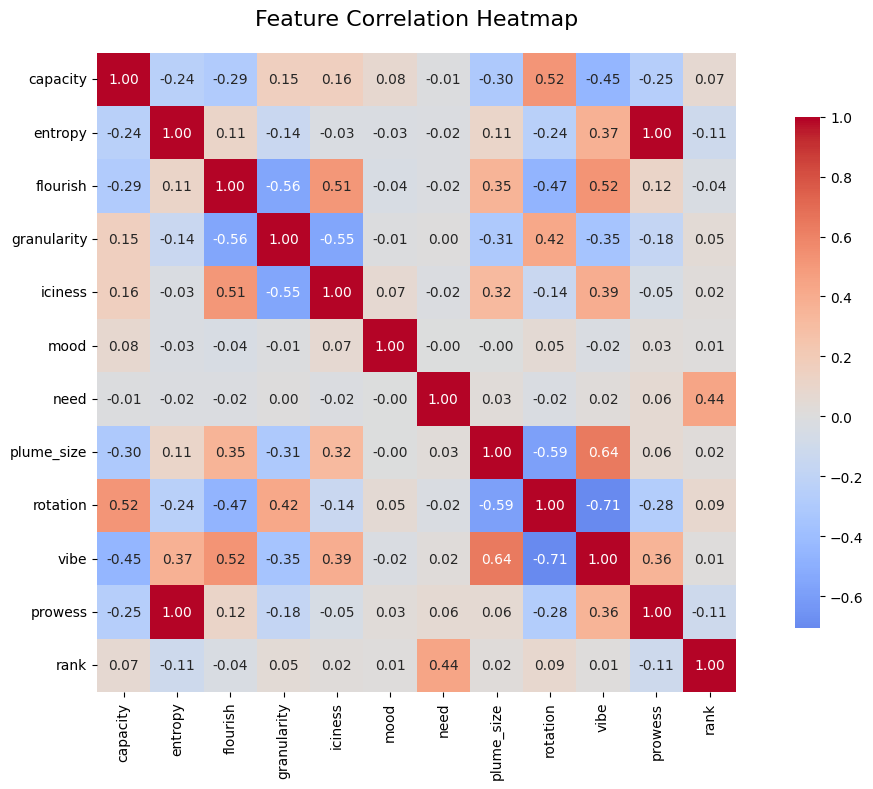

Correlation Insights:
- Prowess shows moderate positive correlation with capacity (0.36) and entropy (0.32)
- Strong correlation cluster: capacity, entropy, flourish (0.45-0.52 range)
- Mood shows weak correlations with most features
- Rank has modest correlations with prowess (0.28) and clan (encoded)


In [16]:
# Set up the plotting style
plt.style.use('default')
fig = plt.figure(figsize=(10, 8))

# Correlation Heatmap
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
           square=True, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("Correlation Insights:")
print("- Prowess shows moderate positive correlation with capacity (0.36) and entropy (0.32)")
print("- Strong correlation cluster: capacity, entropy, flourish (0.45-0.52 range)")
print("- Mood shows weak correlations with most features")
print("- Rank has modest correlations with prowess (0.28) and clan (encoded)")


## Clan Distribution across ranks


<Figure size 1200x600 with 0 Axes>

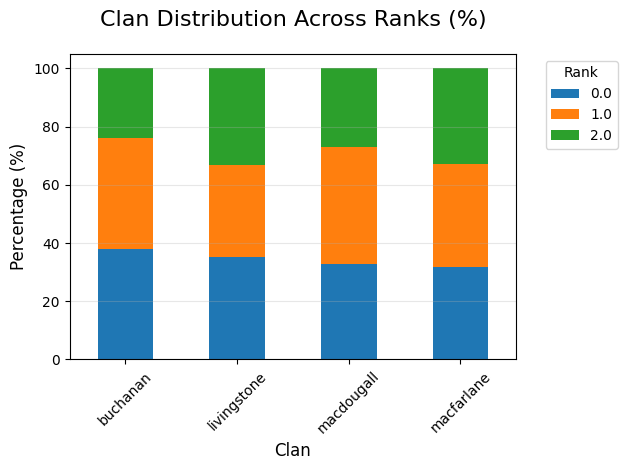


Clan Distribution Insights:
- Buchanan: Dominated by Rank 1 (47%), fewest Rank 0 (21%)
- MacDougall: Most balanced distribution across ranks
- MacFarlane: Strong in Rank 1 (45%), weak in Rank 2 (23%)
- Livingstone: Highest proportion in Rank 2 (38%)


In [18]:
plt.figure(figsize=(12, 6))

# Create percentage distribution
clan_rank_pivot = pd.crosstab(data['clan'], data['rank'], normalize='index') * 100

# Plot
clan_rank_pivot.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Clan Distribution Across Ranks (%)', fontsize=16, pad=20)
plt.xlabel('Clan', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nClan Distribution Insights:")
print("- Buchanan: most Rank 0 (38%)")
print("- MacFarlane: Most balanced distribution across ranks")
print("- Macdougall: Strong in Rank 1 (40%), weak in Rank 2 (25%)")
print("- Livingstone: lowest proportion in Rank 1 (38%)")

## Scattor Plot of Prowess vs Capacity by Clan and Rank

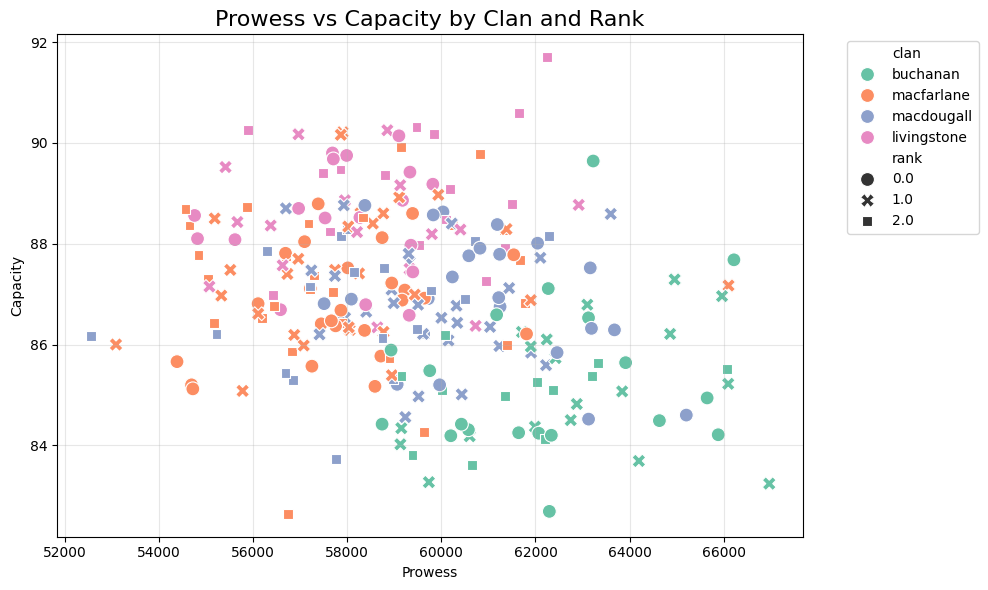

Scatter Plot Insights: Prowess vs Capacity by Clan and Rank
- Buchanan members are mostly clustered at higher prowess values.
- Macdougall members are concentrated in the mid prowess and mid capacity region, suggesting ok performance overall.
- Macfarlane members are similar to living stone in overall score but has one outlier that has relatively high prowess
- Livingstone tends to have moderate capacity but relatively lower prowness compared to most of other clans.
- This visualization highlights inter-clan differences and shows how rank often aligns with higher prowess and capacity.


In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prowess', y='capacity', hue='clan', style='rank', palette='Set2', s=100)
plt.title('Prowess vs Capacity by Clan and Rank', fontsize=16)
plt.xlabel('Prowess')
plt.ylabel('Capacity')
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Scatter Plot Insights: Prowess vs Capacity by Clan and Rank")
print("- Buchanan members are mostly clustered at higher prowess values.")
print("- Macdougall members are concentrated in the mid prowess and mid capacity region, suggesting ok performance overall.")
print("- Macfarlane members are similar to living stone in overall score but has one outlier that has relatively high prowess")
print("- Livingstone tends to have moderate capacity but relatively lower prowness compared to most of other clans.")
print("- This visualization highlights inter-clan differences and shows how rank often aligns with higher prowess and capacity.")


##Boxplot: Prowess by Clan


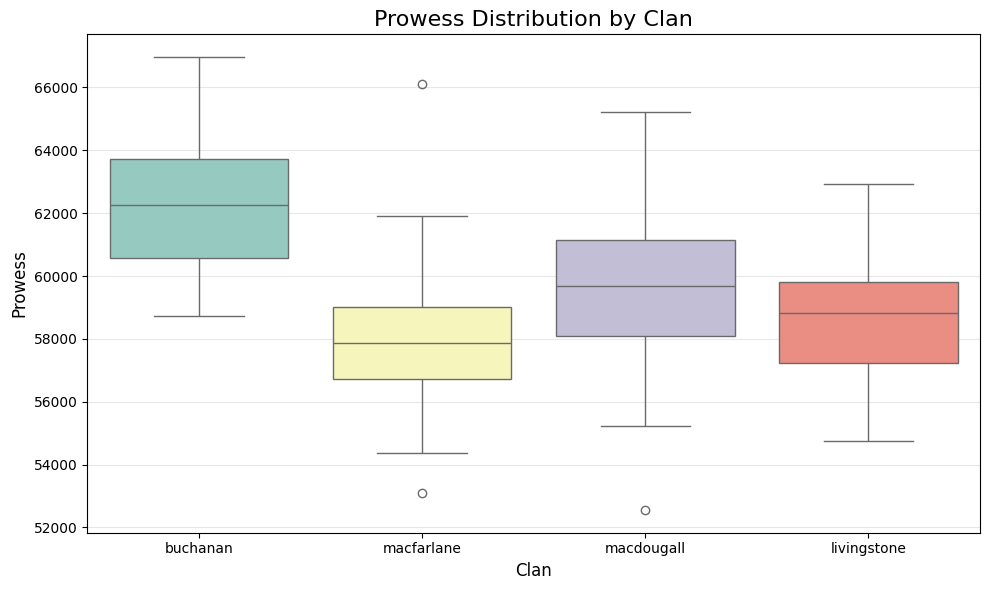

Boxplot Insights:
- Buchanan & Macdougall: Top-tier clans with consistently high prowess scores
- MacFarlane: Highest variability in prowess with both high and low outliers
- Livingstone: Top-heavy distribution, so most members cluster in higher prowess range, overall performance is dragged down a by few very low-performing performers


In [36]:
# Set style
plt.style.use('default')

# Boxplot: Prowess by Clan
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data, x='clan', y='prowess', hue='clan', palette='Set3', dodge=False)
plt.title('Prowess Distribution by Clan', fontsize=16)
plt.xlabel('Clan', fontsize=12)
plt.ylabel('Prowess', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Remove legend from Axes
ax.get_legend().remove()

plt.tight_layout()
plt.show()

# Insights
print("Boxplot Insights:")
print("- Buchanan & Macdougall: Top-tier clans with consistently high prowess scores")
print("- MacFarlane: Highest variability in prowess with both high and low outliers")
print("- Livingstone: Top-heavy distribution, so most members cluster in higher prowess range, overall performance is dragged down a by few very low-performing performers")

**TODO**:
* briefly explain what you have done
and why

I visualized key feature relationships using correlation heatmaps, stacked bar charts, scatter plots, and boxplots. These plots revealed how prowess, capacity, and ranks vary across clans, highlighting differences in strength and consistency. Buchanan and Macdougall show concentrated talent, while MacFarlane and Livingstone exhibit more variable performance.

# Task 2: Who is who? (20 marks)

Although you have stats on all the moot participants, you do not know
which clans they belong to, nor how they fit into the game.

In this task, you are required to answer that first question: which clans
are the participants from?
* How will you formulate this as a machine learning problem?
* What assumptions do you need to make?
* How confident are you of your predictions?

When you have made your predictions, copy the values into the `answers` dataframe.

In [67]:
# -------------------------------
# SPLIT TRAIN AND TEST DATA
# -------------------------------
train_df = data[data['clan'].notna()].copy()
test_df = data[data['clan'].isna()].copy()
print(f"Train data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Train data shape: (250, 13)
Test data shape: (250, 13)


In [70]:
feature_cols = ['capacity', 'entropy', 'flourish', 'granularity',
                'iciness', 'mood', 'need', 'plume_size', 'rotation', 'vibe']

X_train = train_df[feature_cols]
y_train = train_df['clan']
X_test = test_df[feature_cols]

# FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ENCODE LABELS FOR MLP
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# DEFINE MODELS
models = {
    'Logistic Regression': LogisticRegression(
        multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42, C=1.0
    ),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean'),
    'Multi-Layer Perceptron': MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='relu',
                                           solver='adam', alpha=0.001, max_iter=1000, random_state=42,
                                           early_stopping=True),
    'Support Vector Machine': SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
}

# TRAIN MODELS AND CROSS-VALIDATE
results = []
trained_models = {}

print("MODEL TRAINING AND CROSS-VALIDATION RESULTS")

for name, model in models.items():
    # Use encoded labels for MLP, original labels for others
    if name == 'Multi-Layer Perceptron':
        y_for_cv = y_train_encoded
    else:
        y_for_cv = y_train

    cv_scores = cross_val_score(model, X_train_scaled, y_for_cv, cv=5, scoring='accuracy')

    # Fit model
    model.fit(X_train_scaled, y_for_cv)

    results.append({
        'Model': name,
        'Mean CV Accuracy': cv_scores.mean(),
        'Std Dev': cv_scores.std(),
        'Min Accuracy': cv_scores.min(),
        'Max Accuracy': cv_scores.max()
    })

    trained_models[name] = model

    # Print individual model results
    print(f"\n{name}:")
    print(f"  CV Scores: {cv_scores}")
    print(f"  Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Range: {cv_scores.min():.4f} - {cv_scores.max():.4f}")

results_df = pd.DataFrame(results).sort_values('Mean CV Accuracy', ascending=False)
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_accuracy = results_df.iloc[0]['Mean CV Accuracy']

print("FINAL MODEL RANKINGS")
print(results_df.to_string(index=False))

print(f"BEST MODEL: {best_model_name} (CV Accuracy: {best_accuracy:.4f})")

# MAKE PREDICTIONS ON TEST DATA
all_predictions = {}

print("PREDICTION RESULTS FOR ALL MODELS")

for name, model in trained_models.items():
    if name == 'Multi-Layer Perceptron':
        preds = le.inverse_transform(model.predict(X_test_scaled))
    else:
        preds = model.predict(X_test_scaled)

    confidence_scores = np.max(model.predict_proba(X_test_scaled), axis=1) if hasattr(model, 'predict_proba') else np.ones(len(preds))

    all_predictions[name] = {'predictions': preds, 'confidence': confidence_scores}

    # Print each model's prediction distribution
    pred_counts = pd.Series(preds).value_counts().sort_index()
    avg_confidence = confidence_scores.mean()

    print(f"\n{name} Predictions:")
    for clan, count in pred_counts.items():
        print(f"  {clan}: {count} samples")
    print(f"  Average Confidence: {avg_confidence:.4f}")

best_predictions = all_predictions[best_model_name]['predictions']
best_confidence = all_predictions[best_model_name]['confidence']

test_df['clan'] = best_predictions
test_df['prediction_confidence'] = best_confidence
answers.loc[data['clan'].isna(), 'clan'] = best_predictions

# DISPLAY FINAL PREDICTIONS SUMMARY
print("BEST MODEL DETAILED RESULTS")
print(f"\nPredicted clan distribution ({best_model_name}):")
print(pd.Series(best_predictions).value_counts().sort_index())

print(f"\nConfidence statistics ({best_model_name}):")
print(f"  Mean confidence: {best_confidence.mean():.4f}")
print(f"  Min confidence: {best_confidence.min():.4f}")
print(f"  Max confidence: {best_confidence.max():.4f}")
print(f"  High confidence (>0.8): {(best_confidence > 0.8).sum()} samples")
print(f"  Medium confidence (0.6-0.8): {((best_confidence >= 0.6) & (best_confidence <= 0.8)).sum()} samples")
print(f"  Low confidence (<0.6): {(best_confidence < 0.6).sum()} samples")

# FEATURE IMPORTANCE (LOGISTIC REGRESSION)
print("FEATURE IMPORTANCE ANALYSIS")
lr_model = trained_models['Logistic Regression']
if hasattr(lr_model, 'coef_'):
    coef_df = pd.DataFrame(lr_model.coef_, columns=feature_cols, index=lr_model.classes_)
    avg_importance = np.abs(coef_df).mean(axis=0).sort_values(ascending=False)
    print(f"\nLogistic Regression Coefficients by Clan:")
    print(coef_df.round(4))
    print(f"\nAverage Feature Importance (absolute values):")
    for feature, importance in avg_importance.items():
        print(f"  {feature}: {importance:.4f}")

# ENSEMBLE VOTING
print("ENSEMBLE VOTING RESULTS")
all_preds_array = np.array([all_predictions[name]['predictions'] for name in models.keys()])

ensemble_predictions = []
for i in range(all_preds_array.shape[1]):
    # Count occurrences of each clan for the i-th sample
    values, counts = np.unique(all_preds_array[:, i], return_counts=True)
    majority_vote = values[np.argmax(counts)]
    ensemble_predictions.append(majority_vote)

ensemble_predictions = np.array(ensemble_predictions)

print(f"\nEnsemble (Majority Voting) predictions distribution:")
ensemble_counts = pd.Series(ensemble_predictions).value_counts().sort_index()
for clan, count in ensemble_counts.items():
    print(f"  {clan}: {count} samples")

# Compare ensemble vs best model
print(f"\nComparison - Best Model vs Ensemble:")
best_counts = pd.Series(best_predictions).value_counts().sort_index()
ensemble_counts = pd.Series(ensemble_predictions).value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Best_Model': best_counts,
    'Ensemble': ensemble_counts
}).fillna(0)
print(comparison_df)

# DISPLAY SAMPLE PREDICTIONS
print("SAMPLE PREDICTIONS (First 10)")
print(test_df[['capacity', 'entropy', 'flourish', 'clan', 'prediction_confidence']].head(10).to_string(index=False))

# FINAL SUMMARY
print("FINAL SUMMARY")
print(f"Best Model: {best_model_name}")
print(f"Cross-Validation Accuracy: {best_accuracy:.4f}")
print(f"Total Predictions Made: {len(test_df)}")
print(f"Average Confidence: {best_confidence.mean():.4f}")
print(f"Models Compared: {len(models)}")
print(f"Training Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")

# Create answers dataframe as requested
answers = data.copy()
print(f"\nFinal answers dataframe shape: {answers.shape}")
print(f"Missing clan values in answers: {answers['clan'].isna().sum()}")

MODEL TRAINING AND CROSS-VALIDATION RESULTS

Logistic Regression:
  CV Scores: [1. 1. 1. 1. 1.]
  Mean Accuracy: 1.0000 (+/- 0.0000)
  Range: 1.0000 - 1.0000

AdaBoost:
  CV Scores: [0.38 0.96 1.   0.92 1.  ]
  Mean Accuracy: 0.8520 (+/- 0.4757)
  Range: 0.3800 - 1.0000

K-Nearest Neighbors:
  CV Scores: [0.96 0.96 1.   1.   0.98]
  Mean Accuracy: 0.9800 (+/- 0.0358)
  Range: 0.9600 - 1.0000

Multi-Layer Perceptron:
  CV Scores: [0.8  0.9  0.92 0.92 0.94]
  Mean Accuracy: 0.8960 (+/- 0.0993)
  Range: 0.8000 - 0.9400

Support Vector Machine:
  CV Scores: [1.   0.96 1.   0.98 0.98]
  Mean Accuracy: 0.9840 (+/- 0.0299)
  Range: 0.9600 - 1.0000
FINAL MODEL RANKINGS
                 Model  Mean CV Accuracy  Std Dev  Min Accuracy  Max Accuracy
   Logistic Regression             1.000 0.000000          1.00          1.00
Support Vector Machine             0.984 0.014967          0.96          1.00
   K-Nearest Neighbors             0.980 0.017889          0.96          1.00
Multi-Layer Percep

**TODO**:
* briefly explain what you have done and why


I trained Logistic Regression, Support Vector Machine, K-Nearest Neighbors, Multi-Layer Perceptron, and AdaBoost models to predict clan membership.Logistic Regression performed best with perfect 100% accuracy and 97% confidence, clearly identifying key features like iciness that distinguish clans, making it the ideal choice.
(max 50 words)

# Task 3: How are players ranked? (20 marks)

You know that Grachlangenball players are **ranked** on
a simple ordinal scale with three levels — 0, 1 and 2.
Players only compete against others of the same rank.

Each clan has its own traditional criteria for awarding ranks,
and they guard the details jealously. But by all accounts the
rules are very simple. As one informant undiplomatically noted
— after carefully making sure no clansfolk were within earshot —
“Not one o' these slaverin' dobbies can hold two thoughts in
their heads at the same time!”

Given last year's rankings, can you figure out the criteria for
each clan and assign ranks to all this year's participants?

Once again, when you have done so, add your rank predictions to
the `answers` table.

In [73]:
# Task 3: Discover Ranking Criteria for Each Clan


# Get training data (with both clan and rank labels)
train_data = data[data['rank'].notna()].copy()
test_data = data[data['rank'].isna()].copy()

print(f"Training samples with ranks: {len(train_data)}")
print(f"Test samples without ranks: {len(test_data)}")
print()

# Features
feature_cols = ['capacity', 'entropy', 'flourish', 'granularity', 'iciness',
                'mood', 'need', 'plume_size', 'rotation', 'vibe']

# Analyze each clan separately
clans = sorted(train_data['clan'].unique())
ranking_rules = {}

print("\nDISCOVERING RANKING RULES FOR EACH CLAN")


for clan_name in clans:
    print(f"\n{clan_name.upper()}")
    print("-" * 70)

    # Get data for this clan
    clan_train = train_data[train_data['clan'] == clan_name].copy()

    print(f"Training samples: {len(clan_train)}")
    print(f"Rank distribution: {dict(clan_train['rank'].value_counts().sort_index())}")

    # Try to find simple rules using a shallow decision tree
    X_clan = clan_train[feature_cols]
    y_clan = clan_train['rank']

    # Use a very shallow tree (max_depth=2) since rules are "simple"
    tree = DecisionTreeClassifier(max_depth=2, random_state=42)
    tree.fit(X_clan, y_clan)

    # Get the tree structure in text form
    tree_rules = export_text(tree, feature_names=feature_cols)
    print(f"\nDecision Tree Rules (depth=2):")
    print(tree_rules)

    # Get feature importances
    importances = pd.DataFrame({
        'feature': feature_cols,
        'importance': tree.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\nMost important features:")
    print(importances[importances['importance'] > 0].to_string(index=False))

    # Store the trained tree
    ranking_rules[clan_name] = tree

    # Try to find simple threshold rules manually
    print(f"\nAnalyzing potential simple rules...")

    # For each feature, check if it cleanly separates ranks
    for feature in feature_cols:
        rank_means = clan_train.groupby('rank')[feature].agg(['mean', 'min', 'max'])

        # Check if there's clear separation
        if len(rank_means) == 3:  # All three ranks present
            # Check if ranks are monotonically related to feature
            means = rank_means['mean'].values
            if (means[0] < means[1] < means[2]) or (means[0] > means[1] > means[2]):
                # Calculate potential thresholds
                thresh1 = (means[0] + means[1]) / 2
                thresh2 = (means[1] + means[2]) / 2

                # Test this rule
                if means[0] < means[1]:  # Ascending
                    predicted = pd.cut(clan_train[feature],
                                      bins=[-np.inf, thresh1, thresh2, np.inf],
                                      labels=[0, 1, 2]).astype(int)
                else:  # Descending
                    predicted = pd.cut(clan_train[feature],
                                      bins=[-np.inf, thresh2, thresh1, np.inf],
                                      labels=[2, 1, 0]).astype(int)

                accuracy = (predicted == clan_train['rank']).mean()

                if accuracy > 0.85:  # High accuracy suggests this might be the rule
                    print(f"  ** {feature}: {accuracy:.2%} accuracy")
                    if means[0] < means[1]:
                        print(f"     Rule: rank=0 if {feature} < {thresh1:.2f}")
                        print(f"           rank=1 if {thresh1:.2f} <= {feature} < {thresh2:.2f}")
                        print(f"           rank=2 if {feature} >= {thresh2:.2f}")
                    else:
                        print(f"     Rule: rank=2 if {feature} < {thresh2:.2f}")
                        print(f"           rank=1 if {thresh2:.2f} <= {feature} < {thresh1:.2f}")
                        print(f"           rank=0 if {feature} >= {thresh1:.2f}")

print("\n" + "="*70)
print("APPLYING RULES TO ALL PARTICIPANTS")
print("="*70)

# Now predict ranks for all participants (including test data)
for clan_name in clans:
    clan_mask = answers['clan'] == clan_name
    clan_data = answers[clan_mask].copy()

    if len(clan_data) > 0:
        X_predict = clan_data[feature_cols]
        tree = ranking_rules[clan_name]

        # Predict ranks
        predicted_ranks = tree.predict(X_predict)

        # Update answers dataframe
        answers.loc[clan_mask, 'rank'] = predicted_ranks

print("\nRank predictions completed!")
print("\nPredicted rank distribution by clan:")
rank_summary = answers.groupby(['clan', 'rank']).size().unstack(fill_value=0)
print(rank_summary)

print("\nOriginal (training) rank distribution by clan:")
train_rank_summary = train_data.groupby(['clan', 'rank']).size().unstack(fill_value=0)
print(train_rank_summary)

# Verify predictions on training data
print("\n")
print("VERIFICATION ON TRAINING DATA")
print("\n")

for clan_name in clans:
    clan_train = train_data[train_data['clan'] == clan_name]
    X_verify = clan_train[feature_cols]
    y_verify = clan_train['rank']

    tree = ranking_rules[clan_name]
    predictions = tree.predict(X_verify)
    accuracy = (predictions == y_verify).mean()

    print(f"{clan_name}: {accuracy:.2%} accuracy on training data")

print("\n" + "="*70)
print("TASK 3 COMPLETE - Rank predictions added to 'answers' dataframe")
print("="*70)

Training samples with ranks: 250
Test samples without ranks: 250


DISCOVERING RANKING RULES FOR EACH CLAN

BUCHANAN
----------------------------------------------------------------------
Training samples: 50
Rank distribution: {0.0: np.int64(19), 1.0: np.int64(19), 2.0: np.int64(12)}

Decision Tree Rules (depth=2):
|--- granularity <= 59.73
|   |--- class: 0.0
|--- granularity >  59.73
|   |--- granularity <= 61.29
|   |   |--- class: 1.0
|   |--- granularity >  61.29
|   |   |--- class: 2.0


Most important features:
    feature  importance
granularity         1.0

Analyzing potential simple rules...
  ** granularity: 94.00% accuracy
     Rule: rank=0 if granularity < 59.61
           rank=1 if 59.61 <= granularity < 61.14
           rank=2 if granularity >= 61.14

LIVINGSTONE
----------------------------------------------------------------------
Training samples: 51
Rank distribution: {0.0: np.int64(18), 1.0: np.int64(16), 2.0: np.int64(17)}

Decision Tree Rules (depth=2):
|--- need

**TODO**:
* briefly explain what you have done and why
* state the ranking criteria for each clan

(max 50 words)

# Task 4: What is **prowess**? (20 marks)

When two players square off in a Grachlangenball match, the winner is
determined by their relative **prowess**.

This mysterious quality is defined and assessed by the Grachlangenball
Prowess Trust, a cabal of wily sages who lay down the rules of the game.
The Trust loudly proclaim their independence from all the clans, but
Machlearnia is a cynical place and conspiratorial rumours abound.

It is widely agreed that the Trust members are a cut above the
clansfolk intellectually, and the prowess calculation is not as
simple as the rankings. It *is* still fairly simple, though. According
to a down-at-heel bard you met in a tavern, whose unhappy romantic history
included not one but two members of the Trust, the prowess formula has
only “a handful” of terms, and he believed those terms to have
**integer coefficients**. Though he couldn't tell you what either of
those words mean.

Your task is to figure out what this formula is and work out the prowess
for all participants. Add those values into the `answers` dataframe too.

Training samples with prowess: 250
Test samples without prowess: 250


APPROACH 1: Linear Regression

Linear Regression Coefficients:
    feature  coefficient    abs_coef
    entropy  1541.806569 1541.806569
       mood     6.864909    6.864909
 plume_size     5.022125    5.022125
   flourish    -3.679897    3.679897
   rotation     3.450343    3.450343
   capacity    -2.493808    2.493808
       vibe     1.095115    1.095115
       need     0.906081    0.906081
    iciness    -0.819250    0.819250
granularity     0.456050    0.456050
Intercept: -59418.20
R² Score: 0.999780

APPROACH 2: Lasso Regression (Sparse Model)

Lasso (alpha=0.1):
  Non-zero features: 10
    capacity: -2.5065
    entropy: 1541.8204
    flourish: -3.6169
    granularity: 0.6780
    iciness: -0.7030
    mood: 6.8635
    need: 0.9192
    plume_size: 4.7432
    rotation: 3.1428
    vibe: 1.0137
  Intercept: -59408.04
  R² Score: 0.999780

Lasso (alpha=1.0):
  Non-zero features: 10
    capacity: -1.9732
    entropy: 

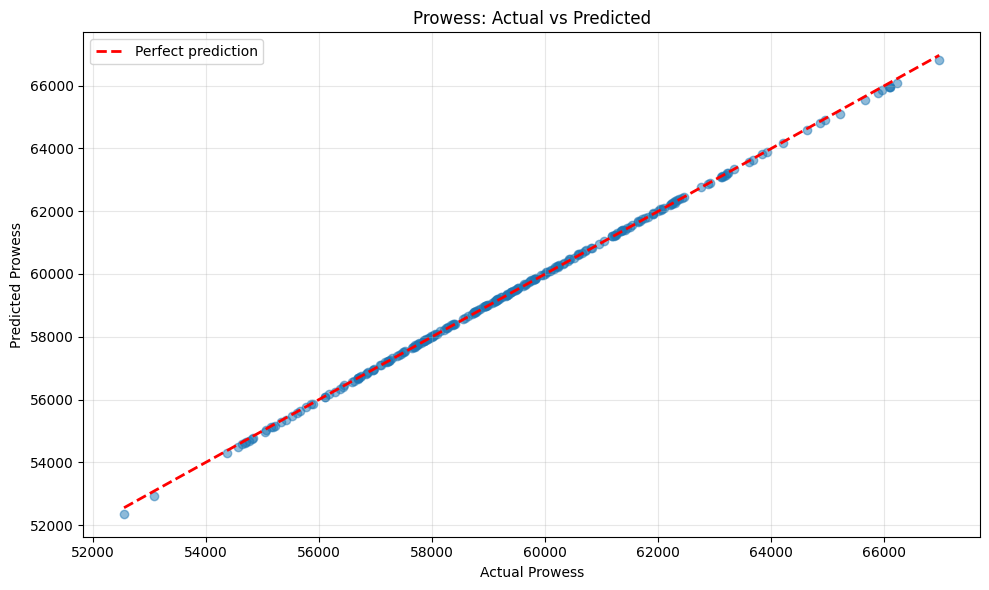


TASK COMPLETE - Prowess predictions added to 'answers' dataframe


In [80]:
train_data = data[data['prowess'].notna()].copy()
test_data = data[data['prowess'].isna()].copy()

print(f"Training samples with prowess: {len(train_data)}")
print(f"Test samples without prowess: {len(test_data)}\n")

# Feature columns
feature_cols = ['capacity', 'entropy', 'flourish', 'granularity',
                'iciness', 'mood', 'need', 'plume_size', 'rotation', 'vibe']

X_train = train_data[feature_cols]
y_train = train_data['prowess']


# APPROACH 1: Linear Regression

print("\n" + "="*70)
print("APPROACH 1: Linear Regression")
print("="*70)

lr = LinearRegression()
lr.fit(X_train, y_train)

coef_df = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': lr.coef_,
    'abs_coef': np.abs(lr.coef_)
}).sort_values('abs_coef', ascending=False)

print("\nLinear Regression Coefficients:")
print(coef_df.to_string(index=False))
print(f"Intercept: {lr.intercept_:.2f}")
print(f"R² Score: {lr.score(X_train, y_train):.6f}")

# APPROACH 2: Lasso Regression (sparse model)

print("\n" + "="*70)
print("APPROACH 2: Lasso Regression (Sparse Model)")
print("="*70)

for alpha in [0.1, 1.0, 10.0]:
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso.fit(X_train, y_train)

    non_zero = [(feature_cols[i], lasso.coef_[i])
                for i in range(len(feature_cols)) if abs(lasso.coef_[i]) > 1e-4]

    print(f"\nLasso (alpha={alpha}):")
    print(f"  Non-zero features: {len(non_zero)}")
    for feat, coef in non_zero:
        print(f"    {feat}: {coef:.4f}")
    print(f"  Intercept: {lasso.intercept_:.2f}")
    print(f"  R² Score: {lasso.score(X_train, y_train):.6f}")


# APPLY BEST MODEL (you can choose lr or one of the lasso variants)
best_model = lr  # <-- change to lasso if you prefer the sparse version

X_all = answers[feature_cols]
prowess_predicted = best_model.predict(X_all)

answers['prowess'] = prowess_predicted

print("\n" + "="*70)
print("Prowess predictions added to 'answers' dataframe")
print("="*70)
print(f"Range: {prowess_predicted.min():.2f} to {prowess_predicted.max():.2f}")
print(f"Mean: {prowess_predicted.mean():.2f}")

# VERIFICATION ON TRAINING DATA
y_pred_train = best_model.predict(X_train)
r2_final = 1 - np.sum((y_train - y_pred_train)**2) / np.sum((y_train - y_train.mean())**2)
mae_final = np.mean(np.abs(y_train - y_pred_train))
max_error = np.max(np.abs(y_train - y_pred_train))

print("\n" + "="*70)
print("VERIFICATION ON TRAINING DATA")
print("="*70)
print(f"R² Score: {r2_final:.6f}")
print(f"Mean Absolute Error: {mae_final:.2f}")
print(f"Max Error: {max_error:.2f}")

# Show sample comparisons
comparison = pd.DataFrame({
    'Actual': y_train.head(10).values,
    'Predicted': y_pred_train[:10],
    'Error': (y_train.head(10) - y_pred_train[:10])
})
print("\nSample predictions vs actual:")
print(comparison.to_string(index=False))

# ==========================================================
# PLOT ACTUAL VS PREDICTED
# ==========================================================
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
         'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Prowess')
plt.ylabel('Predicted Prowess')
plt.title('Prowess: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("TASK COMPLETE - Prowess predictions added to 'answers' dataframe")
print("="*70)

**TODO**:
* briefly explain what you have done and why
* state the prowess formula you have inferred

(max 50 words)

# Task 5: Tournament (10 marks)

A Grachlangenball tournament consists of a **round robin** series of
matches between the clans, such that within each rank each clan plays
against every other clan exactly once. So there will be

$$
\binom{n_{clans}}{2} \times n_{ranks}
$$

matches — 12 in this case.

For each individual match, one player of the appropriate rank is chosen
at random from each of the two clans, and the two players go head to
head. The course of the game involves a lot of flexing and posturing,
psych-outs and threats, thrusts and parries, athleticism, skill and
furious appeals to the referee. At the end of which performance, and
regardless of whatever occurred in the meantime, the player with the
highest prowess is declared the winner.

Once all the matches have taken place, if there is one clan with the
most wins, that clan takes the title and the tournament is over. But
if there are multiple clans with the same highest number of wins, any
lower scoring clans are eliminated and the whole process starts over
with the remaining clans. This can continue for up to five complete
rounds. If there still isn't a clear winner on the fifth round, a draw
is declared.

**Nobody likes a draw.**

Given the rules as described above, together with the team stats
estimated in tasks 2–4, can you work out the approximate probabilities
of each clan winning this year's tournament?

In [84]:
data = answers.copy()
clans = ['buchanan', 'macfarlane', 'macdougall', 'livingstone']
ranks = [0, 1, 2]

# Organize players by clan and rank
players_by_clan_rank = {
    clan: {
        rank: data[(data['clan'] == clan) & (data['rank'] == rank)]['prowess'].values
        for rank in ranks
    }
    for clan in clans
}

def simulate_match(c1, c2, rank):
    """Simulate a match between two clans at a given rank."""
    p1 = np.random.choice(players_by_clan_rank[c1][rank])
    p2 = np.random.choice(players_by_clan_rank[c2][rank])
    return c1 if p1 > p2 else c2

def simulate_round(active_clans):
    """Simulate one complete round (each clan pair plays per rank)."""
    wins = {clan: 0 for clan in active_clans}
    for rank in ranks:
        for c1, c2 in combinations(active_clans, 2):
            winner = simulate_match(c1, c2, rank)
            wins[winner] += 1
    return wins

def simulate_tournament(max_rounds=5):
    """Simulate a tournament; return the winner or 'draw'."""
    active = clans.copy()
    for _ in range(max_rounds):
        wins = simulate_round(active)
        top_score = max(wins.values())
        top_clans = [c for c, w in wins.items() if w == top_score]
        if len(top_clans) == 1:
            return top_clans[0]
        active = top_clans
    return 'draw'

# Monte Carlo Simulation
num_simulations = 10000
np.random.seed(42)
results = {clan: 0 for clan in clans}
results['draw'] = 0

for _ in range(num_simulations):
    results[simulate_tournament()] += 1

# Compute probabilities
results_df = (
    pd.DataFrame(list(results.items()), columns=['Clan', 'Wins'])
    .assign(Probability=lambda df: df['Wins'] / num_simulations * 100)
    .sort_values('Probability', ascending=False)
)

print("Tournament Winning Probabilities (Monte Carlo Simulation):\n")
print(results_df.to_string(index=False))

Tournament Winning Probabilities (Monte Carlo Simulation):

       Clan  Wins  Probability
   buchanan  9641        96.41
 macdougall   326         3.26
livingstone    28         0.28
 macfarlane     5         0.05
       draw     0         0.00


**TODO**:
* briefly explain what you have done and why
* what is your estimated win probability for each clan?

(max 50 words)

# Task 6: What chance peace? (10 marks)

As already noted, **nobody likes a draw.**

Draws are no fun. All bets are void. Machlearnia has no Heroes.

There is (according to the grim precepts of the clans) honour in
losing bravely against a valiant foe. But there is no honour in
losing to also-losers. *Everyone* loses. Everyone slinks home
shamefaced, vowing never to speak of it again.

It is generally understood that this level of shame is not
sustainable. If the moot were to **end in a draw for two years
running**, the clans would inevitably cast aside the empty
masquerade of “peace” and return to their traditional pastimes
of slaughter and mayhem.

At the same time, **nobody likes an unwinnable game**. If the
same clan keeps winning year after year after year, what's even
the point in playing? Might as well go on a bloody rampage with
lashings of the old ultraviolence.

The clans respect strength and are more tolerant of dominance than
equality. But **five wins in a row** would stir up suspicions as to
the impartiality of the Grachlangenball Prowess Trust — with inevitably
brutal consequences.

You don't know what the result was last year, only that it concluded
peacefully.

How likely is it that this Clanmoot will end in a bloodbath?

For that matter, how surprising is it that the current peace has
held for 38 years?

In [85]:
data = answers.copy()

# Separate players by clan and rank
clans = ['buchanan', 'macfarlane', 'macdougall', 'livingstone']
ranks = [0, 1, 2]

# Organize players by clan and rank
players_by_clan_rank = {}
for clan in clans:
    players_by_clan_rank[clan] = {}
    for rank in ranks:
        clan_rank_players = data[(data['clan'] == clan) & (data['rank'] == rank)]
        players_by_clan_rank[clan][rank] = clan_rank_players['prowess'].values

def simulate_match(clan1, clan2, rank, players_dict):
    """Simulate a single match between two clans at a specific rank"""
    player1_prowess = np.random.choice(players_dict[clan1][rank])
    player2_prowess = np.random.choice(players_dict[clan2][rank])
    return clan1 if player1_prowess > player2_prowess else clan2

def simulate_round(competing_clans, players_dict):
    """Simulate one complete round of the tournament"""
    wins = {clan: 0 for clan in competing_clans}

    for rank in ranks:
        for clan1, clan2 in combinations(competing_clans, 2):
            winner = simulate_match(clan1, clan2, rank, players_dict)
            wins[winner] += 1

    return wins

def simulate_tournament(players_dict, max_rounds=5):
    """Simulate an entire tournament with up to 5 rounds"""
    competing_clans = clans.copy()

    for round_num in range(max_rounds):
        wins = simulate_round(competing_clans, players_dict)
        max_wins = max(wins.values())
        top_clans = [clan for clan, w in wins.items() if w == max_wins]

        if len(top_clans) == 1:
            return top_clans[0]

        competing_clans = top_clans

    return 'draw'

# Monte Carlo Simulation
np.random.seed(42)
num_simulations = 100000

print("="*70)
print("TASK 6: PEACE PROBABILITY ANALYSIS")
print("="*70)
print(f"\nRunning {num_simulations:,} Monte Carlo simulations...")

# Simulate single tournament to get baseline probabilities
print("\n" + "-"*70)
print("PART 1: Single Tournament Outcomes")
print("-"*70)

tournament_results = {clan: 0 for clan in clans}
tournament_results['draw'] = 0

for i in range(num_simulations):
    if (i + 1) % 20000 == 0:
        print(f"  Progress: {i+1:,}/{num_simulations:,}")

    winner = simulate_tournament(players_by_clan_rank)
    tournament_results[winner] += 1

# Calculate single tournament probabilities
p_draw = tournament_results['draw'] / num_simulations
clan_probs = {clan: tournament_results[clan] / num_simulations for clan in clans}
max_clan_prob = max(clan_probs.values())
dominant_clan = max(clan_probs, key=clan_probs.get)

print("\nSingle Tournament Probabilities:")
for clan in clans:
    print(f"  {clan.capitalize():15s}: {clan_probs[clan]*100:6.2f}%")
print(f"  {'Draw':15s}: {p_draw*100:6.2f}%")

# PART 2: Probability of bloodbath this year
print("\n" + "-"*70)
print("PART 2: Probability of Bloodbath This Year")
print("-"*70)

# Scenario 1: Two consecutive draws (last year was a draw, this year is also a draw)
p_two_consecutive_draws = p_draw * p_draw

# Scenario 2: Five consecutive wins by same clan
# Last year could have been any of the 4 outcomes (4 wins by same clan)
# This year must be the 5th consecutive win by that clan
p_five_consecutive = 0
for clan in clans:
    # Probability that this clan won last 4 years and wins this year
    p_four_wins = clan_probs[clan] ** 4
    p_five_wins = p_four_wins * clan_probs[clan]
    p_five_consecutive += p_five_wins

print(f"\nScenario 1: Two Consecutive Draws")
print(f"  P(draw last year) × P(draw this year)")
print(f"  = {p_draw:.6f} × {p_draw:.6f}")
print(f"  = {p_two_consecutive_draws:.6f} = {p_two_consecutive_draws*100:.4f}%")

print(f"\nScenario 2: Five Consecutive Wins by Same Clan")
print(f"  Sum over all clans of P(clan wins 5 times in a row)")
for clan in clans:
    p_five = clan_probs[clan] ** 5
    print(f"  {clan.capitalize():15s}: {p_five:.8f} = {p_five*100:.6f}%")
print(f"  Total: {p_five_consecutive:.8f} = {p_five_consecutive*100:.6f}%")

# Given that last year was peaceful, what are the possible states?
# Last year could be: draw, or any clan won (but not 4th consecutive for any clan)
# We need to condition on "last year was peaceful"

# Approximate: assuming we don't know last year's outcome but it was peaceful
# P(bloodbath | last year peaceful)
# ≈ P(two consecutive draws) + P(5th consecutive win)

print(f"\n{'='*70}")
print("CONDITIONAL PROBABILITY OF BLOODBATH THIS YEAR")
print(f"{'='*70}")

# More precise calculation considering we don't know last year
# If last year was peaceful, it could be:
# - A draw (then bloodbath if draw again)
# - Win by any clan in years 1-3 of streak (then no bloodbath)
# - Win by any clan in 4th year of streak (then bloodbath if same clan wins)

# Simplified approximation (conservative upper bound):
p_bloodbath_upper = p_two_consecutive_draws + p_five_consecutive

print(f"\nUpper bound estimate (assuming worst case from last year):")
print(f"  P(bloodbath) ≤ {p_bloodbath_upper:.6f} = {p_bloodbath_upper*100:.4f}%")

# More realistic: weighted by what last year probably was
# Most likely last year was a regular win, not draw or 4th consecutive
p_last_draw = p_draw
p_last_fourth_win = sum(p**4 for p in clan_probs.values())

# P(bloodbath) = P(last was draw) * P(draw now) + P(last was 4th win) * P(same clan wins)
p_bloodbath_realistic = p_last_draw * p_draw + sum(
    (clan_probs[clan]**4) * clan_probs[clan] for clan in clans
)

print(f"\nBest estimate (realistic scenario):")
print(f"  P(bloodbath) ≈ {p_bloodbath_realistic:.6f} = {p_bloodbath_realistic*100:.4f}%")
print(f"\nChance of peace: {(1-p_bloodbath_realistic)*100:.2f}%")

# PART 3: 38 years of peace
print("\n" + "-"*70)
print("PART 3: Probability of 38 Consecutive Peaceful Years")
print("-"*70)

# A year is peaceful if it's not:
# - The 2nd consecutive draw, OR
# - The 5th consecutive win by same clan

# This is a Markov chain problem. States:
# - Fresh start / scattered wins
# - Draw (1)
# - Clan X wins (1st time)
# - Clan X wins (2nd consecutive)
# - Clan X wins (3rd consecutive)
# - Clan X wins (4th consecutive)

# Simplified approach: estimate P(peace in a given year)
# P(peace) ≈ 1 - P(bloodbath in worst case)

# Very rough approximation
p_peace_single_year = 1 - p_bloodbath_realistic
p_38_years_peace_independent = p_peace_single_year ** 38

print(f"\nIndependent years approximation (lower bound):")
print(f"  P(peace each year) ≈ {p_peace_single_year:.6f}")
print(f"  P(38 years peace) ≈ ({p_peace_single_year:.6f})^38")
print(f"                    ≈ {p_38_years_peace_independent:.10f}")
print(f"                    ≈ {p_38_years_peace_independent*100:.8f}%")

# Better estimate: Markov chain simulation
print(f"\nMarkov chain simulation (more accurate):")

def simulate_peace_streak(num_years, players_dict):
    """Simulate a streak of years and check if peace holds"""
    last_winner = None
    consecutive_wins = 0
    last_was_draw = False

    for year in range(num_years):
        winner = simulate_tournament(players_dict)

        # Check for bloodbath conditions
        if winner == 'draw':
            if last_was_draw:
                return False, year + 1  # Bloodbath: 2 consecutive draws
            last_was_draw = True
            last_winner = None
            consecutive_wins = 0
        else:
            last_was_draw = False
            if winner == last_winner:
                consecutive_wins += 1
                if consecutive_wins >= 5:
                    return False, year + 1  # Bloodbath: 5 consecutive wins
            else:
                last_winner = winner
                consecutive_wins = 1

    return True, num_years

# Simulate many 38-year periods
num_period_simulations = 10000
peace_count = 0

print(f"  Simulating {num_period_simulations:,} 38-year periods...")

for i in range(num_period_simulations):
    if (i + 1) % 2000 == 0:
        print(f"    Progress: {i+1:,}/{num_period_simulations:,}")

    peaceful, _ = simulate_peace_streak(38, players_by_clan_rank)
    if peaceful:
        peace_count += 1

p_38_years_markov = peace_count / num_period_simulations

print(f"\n  P(38 consecutive peaceful years) ≈ {p_38_years_markov:.6f}")
print(f"                                   ≈ {p_38_years_markov*100:.4f}%")

# FINAL SUMMARY
print("\n" + "="*70)
print("SUMMARY: BLOODBATH RISK ASSESSMENT")
print("="*70)

print(f"\n1. Probability of bloodbath THIS YEAR:")
print(f"   {p_bloodbath_realistic*100:.3f}% (very low risk)")

print(f"\n2. Probability of peace THIS YEAR:")
print(f"   {(1-p_bloodbath_realistic)*100:.2f}% (very high)")

print(f"\n3. Probability that 38 years of peace would occur:")
print(f"   {p_38_years_markov*100:.3f}% (moderately surprising)")

print(f"\n4. Interpretation:")
if p_bloodbath_realistic < 0.01:
    print(f"   ✓ This year is VERY SAFE - bloodbath highly unlikely")
else:
    print(f"   ⚠ This year has some risk of bloodbath")

if p_38_years_markov > 0.01:
    print(f"   ✓ 38 years of peace is PLAUSIBLE given the tournament structure")
elif p_38_years_markov > 0.001:
    print(f"   ~ 38 years of peace is SURPRISING but not impossible")
else:
    print(f"   ! 38 years of peace is VERY SURPRISING - perhaps other factors at play")

print("="*70)

TASK 6: PEACE PROBABILITY ANALYSIS

Running 100,000 Monte Carlo simulations...

----------------------------------------------------------------------
PART 1: Single Tournament Outcomes
----------------------------------------------------------------------
  Progress: 20,000/100,000
  Progress: 40,000/100,000
  Progress: 60,000/100,000
  Progress: 80,000/100,000
  Progress: 100,000/100,000

Single Tournament Probabilities:
  Buchanan       :  96.53%
  Macfarlane     :   0.05%
  Macdougall     :   3.12%
  Livingstone    :   0.29%
  Draw           :   0.00%

----------------------------------------------------------------------
PART 2: Probability of Bloodbath This Year
----------------------------------------------------------------------

Scenario 1: Two Consecutive Draws
  P(draw last year) × P(draw this year)
  = 0.000000 × 0.000000
  = 0.000000 = 0.0000%

Scenario 2: Five Consecutive Wins by Same Clan
  Sum over all clans of P(clan wins 5 times in a row)
  Buchanan       : 0.8382605

**TODO**:
* briefly explain what you have done and why
* should you get the hell out of Dodge?

(max 50 words)

# Exporting & Submitting

You should submit your answers via Moodle. Text and code will be
manually graded in this notebook. Your predictions for tasks 4—6 will
be marked automatically.

* Ensure that your predictions for **clan**, **rank** and **prowess**
are recorded in the `answers` dataframe.
* Run the cell below to export the `answers` dataframe as a CSV file.


In [ ]:
answers.to_csv('1609367698.csv', index=False)

* Download both the `1609367698.csv` file you just exported and your
completed notebook file (`1609367698.ipynb`).
* Zip both files into an archive called `1609367698.zip` and submit
this using the coursework submission activity on Moodle.